<a href="https://colab.research.google.com/github/MakaryV/AED_2dn_semester/blob/main/Act_1_Anxiety_%26_Depression_Mental_Health_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anxiety and Depression Mental Health Factors

## Introducci√≥n

Esta base de datos est√° enfocada en la salud mental y sus factores influyentes, incluyendo ansiedad, depresi√≥n y otros indicadores psicol√≥gicos. Su prop√≥sito es proporcionar informaci√≥n valiosa para el an√°lisis de la salud mental, la modelizaci√≥n predictiva y la investigaci√≥n sobre c√≥mo diversos factores afectan el bienestar emocional de las personas.

El conjunto de datos incluye detalles demogr√°ficos, h√°bitos de vida, antecedentes m√©dicos y estrategias de afrontamiento, lo que permite a los investigadores y analistas examinar correlaciones entre variables y desarrollar modelos que predigan niveles de ansiedad, depresi√≥n y estr√©s.

## Descripci√≥n de las Variables
La base de datos est√° compuesta por las siguientes categor√≠as de variables:

1. Demogr√°ficas:
  * Edad.
  * G√©nero.
  * Nivel educativo.
  * Estado de empleo.

2. Factores de estilo de vida:
  * Horas de sue√±o.
  * Horas de actividad f√≠sica.
  * Nivel de apoyo social.

3. M√©tricas de salud mental:
  * Puntuaci√≥n de ansiedad.
  * Puntuaci√≥n de depresi√≥n.
  * Nivel de estr√©s.

4. Historial m√©dico:
  * Antecedentes familiares de enfermedades mentales. (No = 0, S√≠ = 1)
  * Enfermedades cr√≥nicas. (No = 0, S√≠ = 1)
  * Uso de medicamentos.

5. Estrategias de afrontamiento:
  * Terapia. (No va= 0, S√≠ va = 1)
  * Meditaci√≥n. (No usa= 0, S√≠ usa = 1)
  * Uso de sustancias.

6. Factores adicionales:
  * Estr√©s financiero.
  * Estr√©s laboral.
  * Autoestima.
  * Satisfacci√≥n con la vida.
  * Sensaci√≥n de soledad.




## Librer√≠as utilizadas


In [166]:
# Importar librer√≠as
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import plotly.express as px
from scipy.stats import chi2_contingency

# Para cargar el dataset
!pip install opendatasets
import opendatasets as od
import os

## Importar el Dataset de Kaggle


In [167]:

# Guardar mi API Token
# api_token = {"username":"makaryvilla","key":"616b82e32d3678cbec3faa57fe9b8b22"}

dataset_link="https://www.kaggle.com/datasets/ak0212/anxiety-and-depression-mental-health-factors/data"
od.download(dataset_link)

os.chdir("anxiety-and-depression-mental-health-factors")
os.listdir()



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: makaryvilla
Your Kaggle Key: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
Dataset URL: https://www.kaggle.com/datasets/ak0212/anxiety-and-depression-mental-health-factors


['anxiety_depression_data.csv']

In [168]:
# Transformar a DataFrame
df=pd.read_csv('anxiety_depression_data.csv')
df

Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0      56    Male      Bachelor's        Unemployed          6.0   
1      69  Female      Bachelor's           Retired          8.8   
2      46  Female        Master's          Employed          5.3   
3      32  Female     High School        Unemployed          8.8   
4      60  Female      Bachelor's           Retired          7.2   
...   ...     ...             ...               ...          ...   
1195   23  Female           Other           Student          5.1   
1196   43  Female        Master's          Employed          8.9   
1197   71  Female             PhD           Retired          6.0   
1198   21    Male           Other          Employed          8.5   
1199   36    Male           Other          Employed          4.4   

      Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                       0.4                     3              4   
1                       2.8                     6             18   
2                       1.6                     5              5   
3                       0.5                     4              6   
4                       0.7                     2              7   
...                     ...                   ...            ...   
1195                    0.1                     7             16   
1196                    0.4                     9             19   
1197                    0.1                     2             15   
1198                    2.7                     8             12   
1199                    2.6                     7             10   

      Depression_Score  Stress_Level  ...  Chronic_Illnesses  Medication_Use  \
0                    2             9  ...                  0             NaN   
1                    7             6  ...                  0             NaN   
2                   13             8  ...                  0             NaN   
3                    3             4  ...                  1             NaN   
4                   15             3  ...                  0             NaN   
...                ...           ...  ...                ...             ...   
1195                15             5  ...                  0      Occasional   
1196                 4             9  ...                  0             NaN   
1197                 4             2  ...                  0             NaN   
1198                20             2  ...                  1             NaN   
1199                10             5  ...                  0             NaN   

     Therapy  Meditation  Substance_Use Financial_Stress  Work_Stress  \
0          0           1            NaN                4            3   
1          1           0            NaN                1            4   
2          0           1            NaN                8            7   
3          0           0            NaN                7            4   
4          1           1       Frequent                8            9   
...      ...         ...            ...              ...          ...   
1195       0           0            NaN                2            8   
1196       0           1            NaN                8            9   
1197       0           1            NaN                2            9   
1198       0           0            NaN                8            5   
1199       1           0       Frequent                7            2   

      Self_Esteem_Score  Life_Satisfaction_Score  Loneliness_Score  
0                     7                        5                 1  
1                     7                        4                 6  
2                     8                        1                 1  
3                     8                        4                 4  
4                     5                        7                 7  
...                 ...                      ...               ...  
1195                  7                        6   

## An√°lisis descriptivo de variables cuantitativas

### Limpieza de Datos


In [169]:
# Evaluaci√≥n de columnas y tipos de datos
print("Las columnas del DataFrame son las siguientes:")

# Evaluaci√≥n de columnas y tipos de datos
print(f"| {'Columna':<45} | {'Tipo de dato':<25} | {'Cantidad de Nans': <25} |")
print("-" * 105)

cant_nans = df.isna().sum(axis = 0) # Cantidad de NaNs

for col, dtype in df.dtypes.items():
    print(f"| {col:<45} | {str(dtype):<25} | {cant_nans[col]: <25} |")

Las columnas del DataFrame son las siguientes:
| Columna                                       | Tipo de dato              | Cantidad de Nans          |
---------------------------------------------------------------------------------------------------------
| Age                                           | int64                     | 0                         |
| Gender                                        | object                    | 0                         |
| Education_Level                               | object                    | 0                         |
| Employment_Status                             | object                    | 0                         |
| Sleep_Hours                                   | float64                   | 0                         |
| Physical_Activity_Hrs                         | float64                   | 0                         |
| Social_Support_Score                          | int64                     | 0                         |

Se aprecia que solo las variables de Medication_Use y Substance_Use.

Veamos que esta pasando.

In [170]:
# Ver los tipos de datos dentro de cada una
df["Medication_Use"].unique()

array([nan, 'Occasional', 'Regular'], dtype=object)

In [171]:
df["Substance_Use"].unique()

array([nan, 'Frequent', 'Occasional'], dtype=object)

Apreciando el origen de dataset, se puede interpretar que esos valores Nans son equivalentes a que la persona no usa medicaci√≥n u otra sustancia para tratar su ansiedad o depresi√≥n.

Porcederemos a la modificaci√≥n de esos valores.

In [172]:
# Rellenamos los Nans por Never que quiere decir nunca
df["Medication_Use"] = df["Medication_Use"].fillna("Never")
df["Substance_Use"] = df["Substance_Use"].fillna("Never")

In [173]:
# Evaluaci√≥n nuevamente columnas y tipos de datos
print("Las columnas del DataFrame son las siguientes:")

# Evaluaci√≥n de columnas y tipos de datos
print(f"| {'Columna':<45} | {'Tipo de dato':<25} | {'Cantidad de Nans': <25} |")
print("-" * 105)

cant_nans = df.isna().sum(axis = 0) # Cantidad de NaNs

for col, dtype in df.dtypes.items():
    print(f"| {col:<45} | {str(dtype):<25} | {cant_nans[col]: <25} |")

Las columnas del DataFrame son las siguientes:
| Columna                                       | Tipo de dato              | Cantidad de Nans          |
---------------------------------------------------------------------------------------------------------
| Age                                           | int64                     | 0                         |
| Gender                                        | object                    | 0                         |
| Education_Level                               | object                    | 0                         |
| Employment_Status                             | object                    | 0                         |
| Sleep_Hours                                   | float64                   | 0                         |
| Physical_Activity_Hrs                         | float64                   | 0                         |
| Social_Support_Score                          | int64                     | 0                         |

### Selecci√≥n de al menos 5 variables cuantitativas.

In [174]:
df.head()

Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  ...  Chronic_Illnesses  Medication_Use  \
0                 2             9  ...                  0           Never   
1                 7             6  ...                  0           Never   
2                13             8  ...                  0           Never   
3                 3             4  ...                  1           Never   
4                15             3  ...                  0           Never   

  Therapy  Meditation  Substance_Use Financial_Stress  Work_Stress  \
0       0           1          Never                4            3   
1       1           0          Never                1            4   
2       0           1          Never                8            7   
3       0           0          Never                7            4   
4       1           1       Frequent                8            9   

   Self_Esteem_Score  Life_Satisfaction_Score  Loneliness_Score  
0                  7                        5                 1  
1                  7                        4                 6  
2                  8                        1                 1  
3                  8                        4                 4  
4                  5                        7                 7  

[5 rows x 21 columns]

In [175]:
# Se seleccionan todas las variables cuantitativas
var_cuantitativas = ["Age", "Sleep_Hours", "Physical_Activity_Hrs", "Social_Support_Score", "Anxiety_Score", "Depression_Score", "Stress_Level", "Financial_Stress", "Work_Stress", "Self_Esteem_Score", "Life_Satisfaction_Score", "Loneliness_Score"]

df_cuantitativas = df[var_cuantitativas]
df_cuantitativas


Age  Sleep_Hours  Physical_Activity_Hrs  Social_Support_Score  \
0      56          6.0                    0.4                     3   
1      69          8.8                    2.8                     6   
2      46          5.3                    1.6                     5   
3      32          8.8                    0.5                     4   
4      60          7.2                    0.7                     2   
...   ...          ...                    ...                   ...   
1195   23          5.1                    0.1                     7   
1196   43          8.9                    0.4                     9   
1197   71          6.0                    0.1                     2   
1198   21          8.5                    2.7                     8   
1199   36          4.4                    2.6                     7   

      Anxiety_Score  Depression_Score  Stress_Level  Financial_Stress  \
0                 4                 2             9                 4   
1                18                 7             6                 1   
2                 5                13             8                 8   
3                 6                 3             4                 7   
4                 7                15             3                 8   
...             ...               ...           ...               ...   
1195             16                15             5                 2   
1196             19                 4             9                 8   
1197             15                 4             2                 2   
1198             12                20             2                 8   
1199             10                10             5                 7   

      Work_Stress  Self_Esteem_Score  Life_Satisfaction_Score  \
0               3                  7                        5   
1               4                  7                        4   
2               7                  8                        1   
3               4                  8                        4   
4               9                  5                        7   
...           ...                ...                      ...   
1195            8                  7                        6   
1196            9                  7                        6   
1197            9                  9                        3   
1198            5                  1                        3   
1199            2                  6                        4   

      Loneliness_Score  
0                    1  
1                    6  
2                    1  
3                    4  
4                    7  
...                ...  
1195                 5  
1196                 4  
1197                 7  
1198                 7  
1199                 8  

[1200 rows x 12 columns]

### C√°lculo y descripci√≥n de las medidas de tendencia central: media, mediana y moda.

In [176]:
# Medidas de Tendencia Central
media = df_cuantitativas.mean()
mediana = df_cuantitativas.median()
moda = df_cuantitativas.mode().iloc[0] # Tomamos la primera moda si hay m√∫ltiples

print("Medidas de Tendencia Central:")
print(f"Media:\n{media}")
print(f"\nMediana:\n{mediana}")
print(f"\nModa:\n{moda}")

Medidas de Tendencia Central:
Media:
Age                        46.317500
Sleep_Hours                 6.469000
Physical_Activity_Hrs       2.005750
Social_Support_Score        5.055000
Anxiety_Score              10.470000
Depression_Score           10.674167
Stress_Level                5.000833
Financial_Stress            4.992500
Work_Stress                 4.889167
Self_Esteem_Score           5.062500
Life_Satisfaction_Score     5.120000
Loneliness_Score            4.959167
dtype: float64

Mediana:
Age                        46.0
Sleep_Hours                 6.4
Physical_Activity_Hrs       1.4
Social_Support_Score        5.0
Anxiety_Score              10.5
Depression_Score           11.0
Stress_Level                5.0
Financial_Stress            5.0
Work_Stress                 5.0
Self_Esteem_Score           5.0
Life_Satisfaction_Score     5.0
Loneliness_Score            5.0
dtype: float64

Moda:
Age                        43.0
Sleep_Hours                 6.8
Physical_Activity_Hrs   

### C√°lculo y descripci√≥n de las medidas de dispersi√≥n: rango, varianza, desviaci√≥n est√°ndar, percentiles.

In [177]:
rango = df_cuantitativas.max() - df_cuantitativas.min()
varianza = df_cuantitativas.var()
desviacion_estandar = df_cuantitativas.std()
percentile_25 = df_cuantitativas.quantile(0.25)
percentile_50 = df_cuantitativas.quantile(0.5)
percentile_75 = df_cuantitativas.quantile(0.75)

print("Medidas de Dispersi√≥n:")
print(f"\nRango:\n{rango}")
print(f"\nVarianza:\n{varianza}")
print(f"\nDesviaci√≥n Est√°ndar:\n{desviacion_estandar}")
print(f"\nPercentil 25:\n{percentile_25}")
print(f"\nPercentil 50 (Mediana):\n{percentile_50}")
print(f"\nPercentil 75:\n{percentile_75}")

Medidas de Dispersi√≥n:

Rango:
Age                        56.0
Sleep_Hours                10.4
Physical_Activity_Hrs      15.1
Social_Support_Score        8.0
Anxiety_Score              19.0
Depression_Score           19.0
Stress_Level                8.0
Financial_Stress            8.0
Work_Stress                 8.0
Self_Esteem_Score           8.0
Life_Satisfaction_Score     8.0
Loneliness_Score            8.0
dtype: float64

Varianza:
Age                        270.640561
Sleep_Hours                  2.339522
Physical_Activity_Hrs        4.152703
Social_Support_Score         7.037840
Anxiety_Score               34.941551
Depression_Score            31.729441
Stress_Level                 6.442868
Financial_Stress             6.713038
Work_Stress                  6.487289
Self_Esteem_Score            6.408935
Life_Satisfaction_Score      6.604437
Loneliness_Score             6.586321
dtype: float64

Desviaci√≥n Est√°ndar:
Age                        16.451157
Sleep_Hours               

### Resumen de las Medidas de Tendencia Central y Dispersi√≥n

In [178]:
# M√°ximos y m√≠nimos
maximos = df_cuantitativas.max()
minimos = df_cuantitativas.min()

# Crear un DataFrame con los resultados
estadisticas = pd.DataFrame({
    "Media": media,
    "Mediana": mediana,
    "Moda": moda,
    "Rango": rango,
    "Varianza": varianza,
    "Desviaci√≥n Est√°ndar": desviacion_estandar,
    "Percentil 25": percentile_25,
    "Percentil 75": percentile_75,
    "M√°ximo": maximos,
    "M√≠nimo": minimos
})

estadisticas

Media  Mediana  Moda  Rango    Varianza  \
Age                      46.317500     46.0  43.0   56.0  270.640561   
Sleep_Hours               6.469000      6.4   6.8   10.4    2.339522   
Physical_Activity_Hrs     2.005750      1.4   0.1   15.1    4.152703   
Social_Support_Score      5.055000      5.0   9.0    8.0    7.037840   
Anxiety_Score            10.470000     10.5   1.0   19.0   34.941551   
Depression_Score         10.674167     11.0  12.0   19.0   31.729441   
Stress_Level              5.000833      5.0   4.0    8.0    6.442868   
Financial_Stress          4.992500      5.0   4.0    8.0    6.713038   
Work_Stress               4.889167      5.0   7.0    8.0    6.487289   
Self_Esteem_Score         5.062500      5.0   7.0    8.0    6.408935   
Life_Satisfaction_Score   5.120000      5.0   5.0    8.0    6.604437   
Loneliness_Score          4.959167      5.0   5.0    8.0    6.586321   

                         Desviaci√≥n Est√°ndar  Percentil 25  Percentil 75  \
Age                                16.451157          33.0          61.0   
Sleep_Hours                         1.529550           5.4           7.5   
Physical_Activity_Hrs               2.037818           0.6           2.7   
Social_Support_Score                2.652893           3.0           7.0   
Anxiety_Score                       5.911138           5.0          16.0   
Depression_Score                    5.632889           6.0          15.0   
Stress_Level                        2.538281           3.0           7.0   
Financial_Stress                    2.590953           3.0           7.0   
Work_Stress                         2.547016           3.0           7.0   
Self_Esteem_Score                   2.531587           3.0           7.0   
Life_Satisfaction_Score             2.569910           3.0           7.0   
Loneliness_Score                    2.566383           3.0           7.0   

                         M√°ximo  M√≠nimo  
Age                        74.0    18.0  
Sleep_Hours                12.4     2.0  
Physical_Activity_Hrs      15.1     0.0  
Social_Support_Score        9.0     1.0  
Anxiety_Score              20.0     1.0  
Depression_Score           20.0     1.0  
Stress_Level                9.0     1.0  
Financial_Stress            9.0     1.0  
Work_Stress                 9.0     1.0  
Self_Esteem_Score           9.0     1.0  
Life_Satisfaction_Score     9.0     1.0  
Loneliness_Score            9.0     1.0

#### Conclusiones
1. **Edad (Age):**
  * La media es 46.3 a√±os, y la mediana es 46 a√±os, lo que indica que la distribuci√≥n es aproximadamente sim√©trica.
  * La desviaci√≥n est√°ndar de 16.45 sugiere una gran variabilidad en la edad de los participantes.
  * El rango de 56 a√±os (m√≠nimo: 18, m√°ximo: 74) confirma que hay una amplia diversidad de edades en la muestra.

2. **Horas de Sue√±o (Sleep_Hours):**
  * La media es 6.47 horas, con una mediana de 6.4 horas, lo que sugiere una distribuci√≥n bastante equilibrada.
  * La moda es 6.8 horas, lo que indica que es el valor m√°s frecuente en la muestra.
  * Un rango de 10.4 horas y un m√≠nimo de 2 horas sugieren que algunos participantes tienen patrones de sue√±o extremadamente cortos.

3. **Actividad F√≠sica (Physical_Activity_Hrs):**
  * La media de 2 horas y la mediana de 1.4 horas indican que la mayor√≠a de las personas hace poca actividad f√≠sica.
  * La moda es 0.1 horas, lo que sugiere que hay muchos individuos con casi nada de ejercicio.
  * Hay una gran variabilidad (desviaci√≥n est√°ndar de 2.03), y algunos participantes tienen hasta 15.1 horas de actividad f√≠sica, lo que puede indicar atletas o personas con rutinas intensivas.

5. **Apoyo Social (Social_Support_Score):**
  * La media es 5.05, con una mediana de 5.
  * La moda es 9, lo que sugiere que hay un grupo significativo con un alto apoyo social.
  * El rango de 8 (m√≠nimo: 1, m√°ximo: 9) indica que hay personas con muy poco apoyo social.

6. **Ansiedad, Depresi√≥n y Estr√©s (Anxiety_Score, Depression_Score, Stress_Level):**
  * La ansiedad tiene una media de 10.47, con un amplio rango de 19.
  * La depresi√≥n tiene una media de 10.67, con una moda de 12.
  * El estr√©s tiene una media de 5, con una moda de 4, lo que sugiere que es un problema menos pronunciado que la ansiedad o la depresi√≥n.
  * La desviaci√≥n est√°ndar alta (entre 5.6 y 5.9) indica una gran variabilidad en la percepci√≥n del estr√©s y la salud mental en general.

5. **Estr√©s Financiero y Laboral (Financial_Stress, Work_Stress):**
  * La media de estr√©s financiero es 4.99, y la del estr√©s laboral es 4.88, lo que sugiere que ambos factores est√°n equilibrados.
  * Ambos tienen una moda distinta (4 y 7 respectivamente), lo que indica que hay dos patrones de estr√©s diferentes en la muestra.

6. **Autoestima, Satisfacci√≥n con la Vida y Soledad (Self_Esteem_Score, Life_Satisfaction_Score, Loneliness_Score):**
  * La media y la mediana de estos tres indicadores est√°n muy alineadas (alrededor de 5), lo que sugiere que la mayor√≠a de los participantes tiene una percepci√≥n neutral sobre su autoestima, satisfacci√≥n con la vida y soledad.
  * Las modas de 5 y 7 indican que hay grupos con percepciones distintas dentro de la muestra.
  * La variabilidad es relativamente baja (desviaciones est√°ndar entre 2.5 y 2.6), lo que indica que la mayor√≠a de los valores est√°n cercanos al promedio.

### Visualizaci√≥n de los datos: histogramas, boxplots y gr√°ficos de densidad.

#### Histogramas

In [179]:
# Calcular los intervalor adecuados
bins_sturges = int(1 + np.log2(len(df_cuantitativas)))
bins_sturges


11

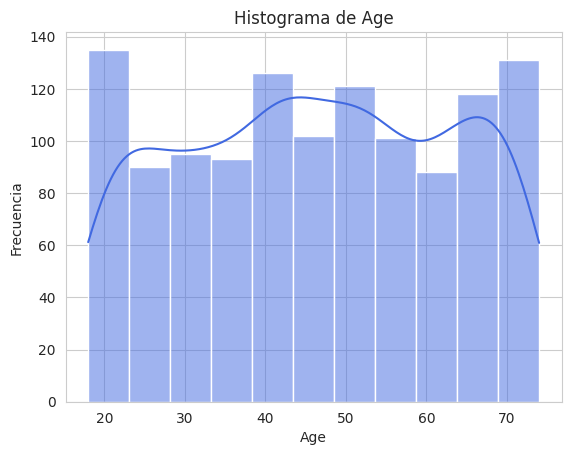

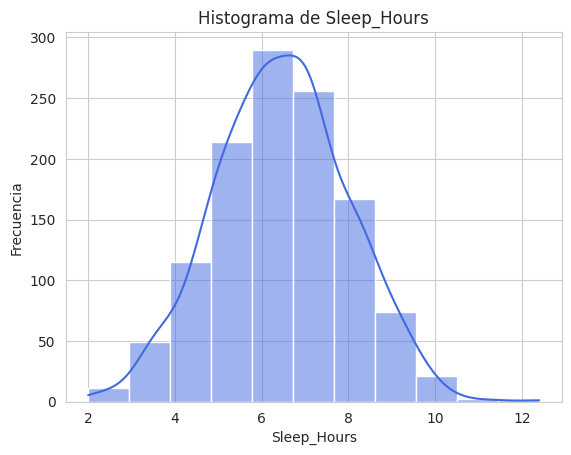

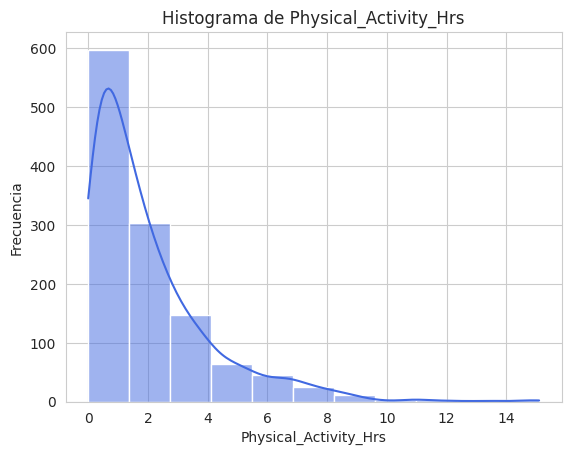

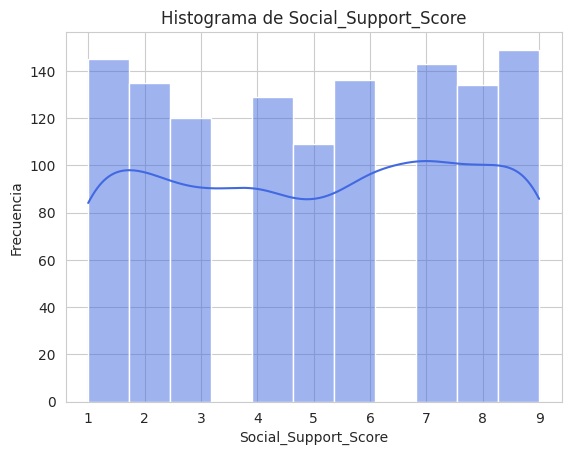

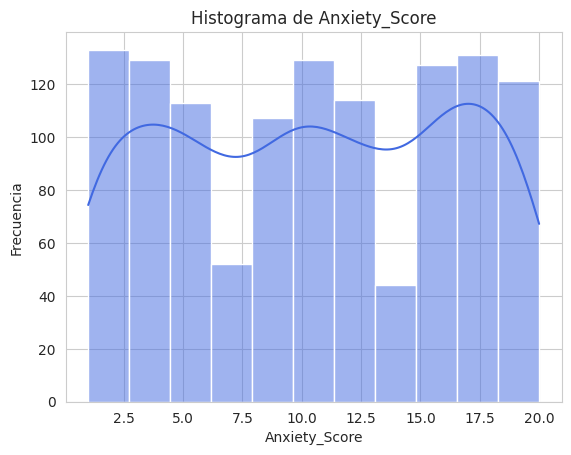

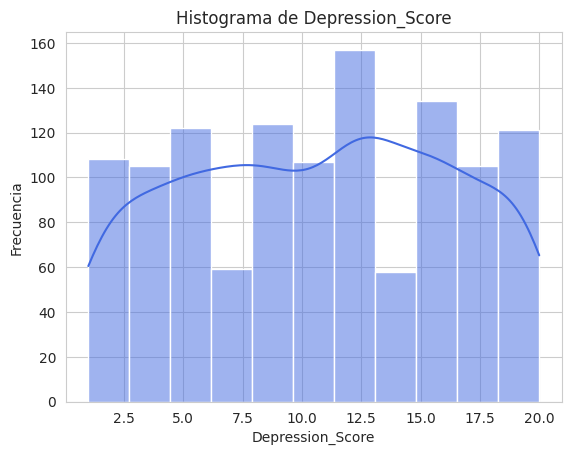

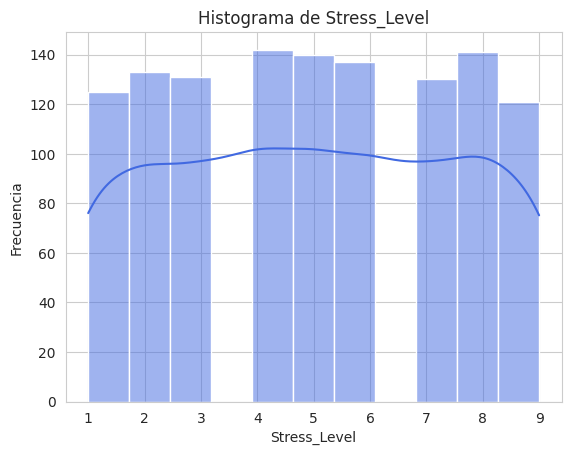

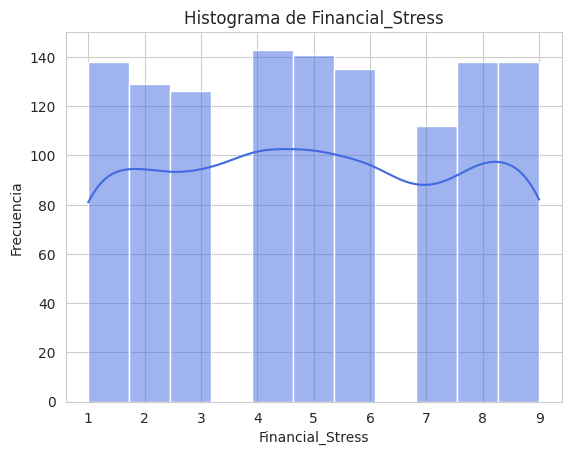

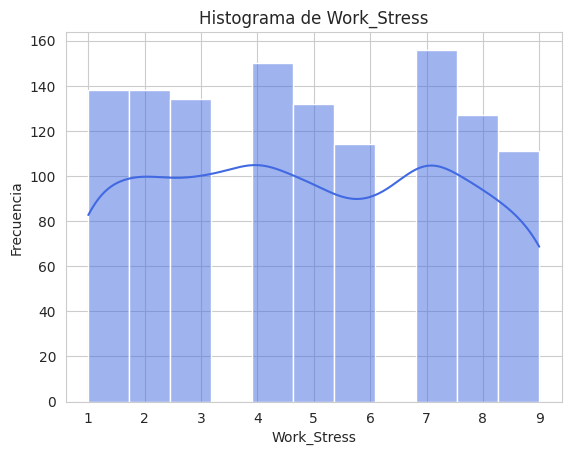

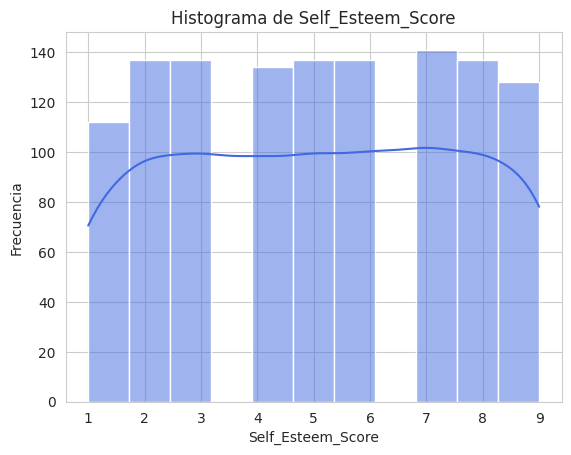

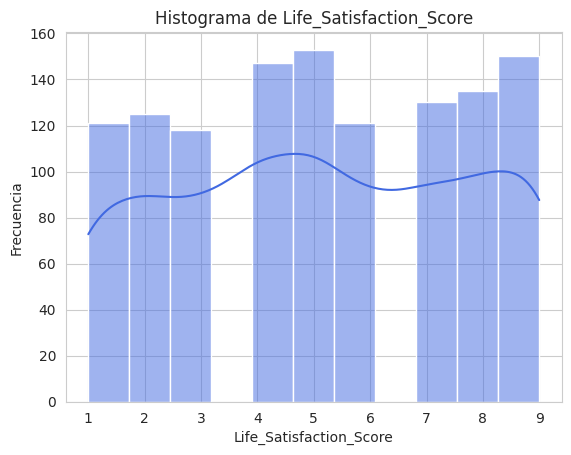

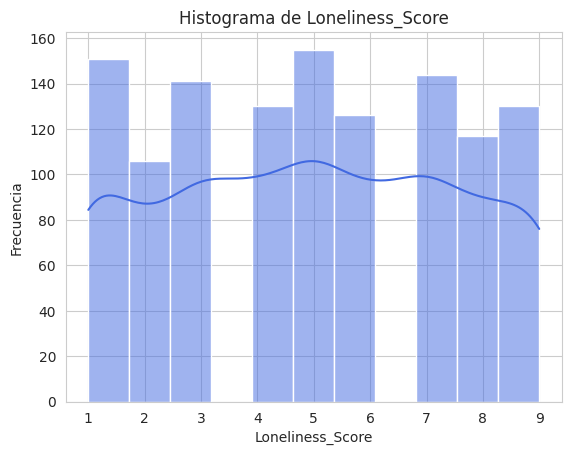

In [180]:
# Configuraci√≥n de estilo para gr√°ficos
sns.set_style("whitegrid")

# Histograms
for var in df_cuantitativas:
  sns.histplot(data=df, x=var, bins=bins_sturges, kde=True, color="royalblue")
  plt.title(f"Histograma de {var}")
  plt.xlabel(f"{var}")
  plt.ylabel("Frecuencia")
  plt.show()

#### Boxplots

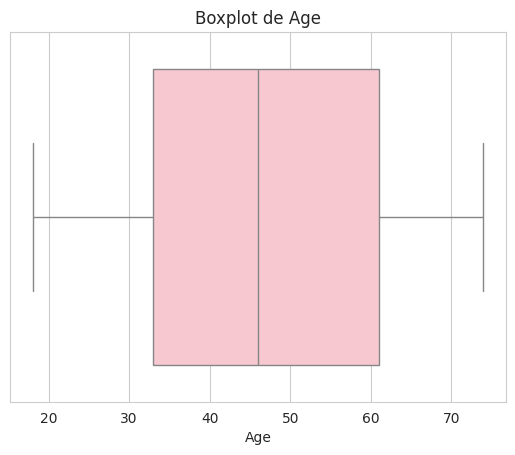

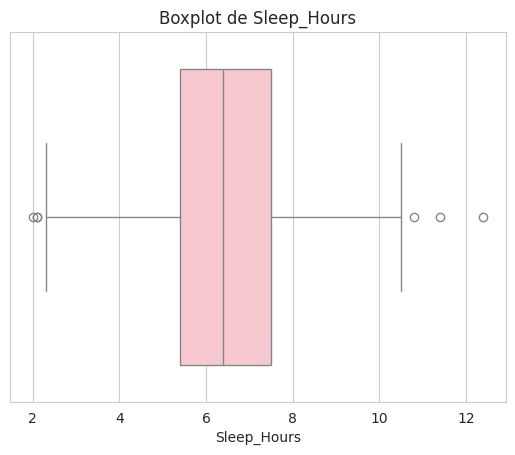

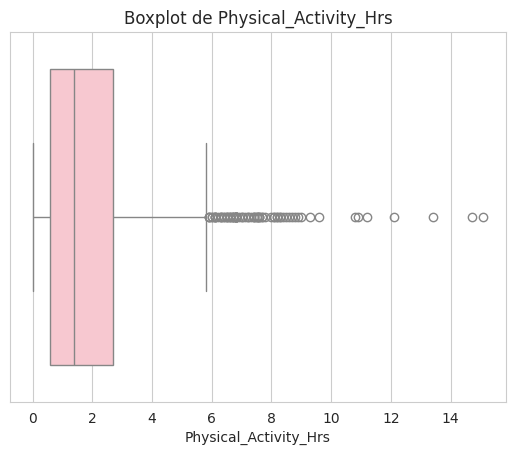

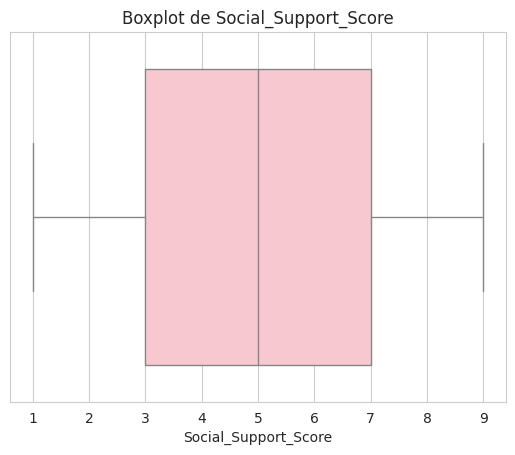

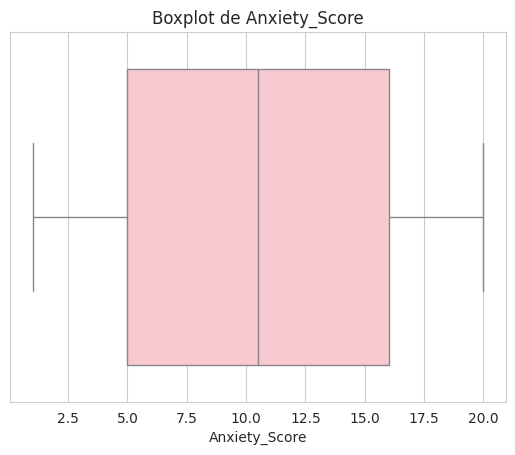

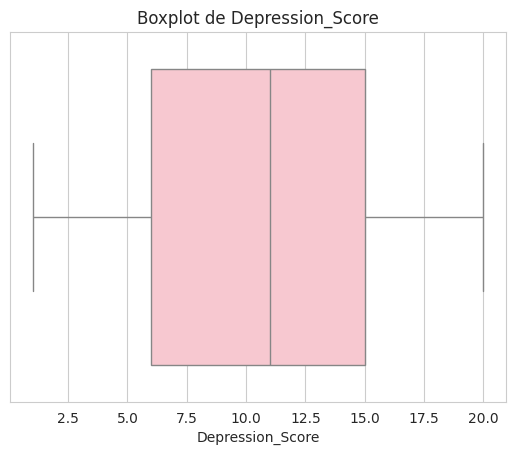

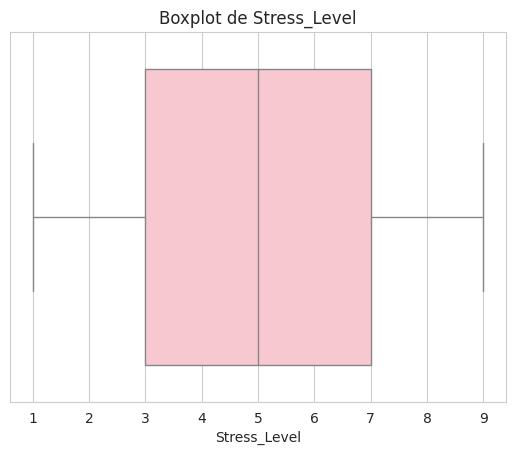

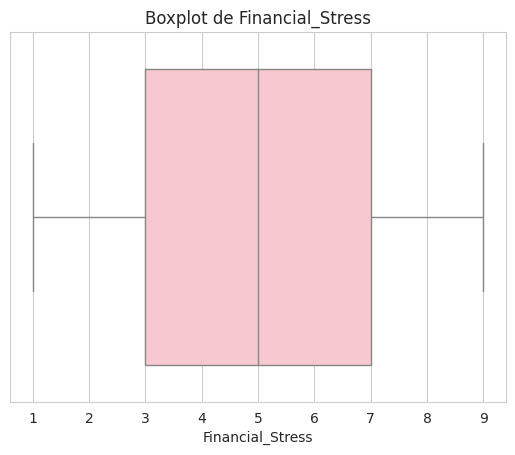

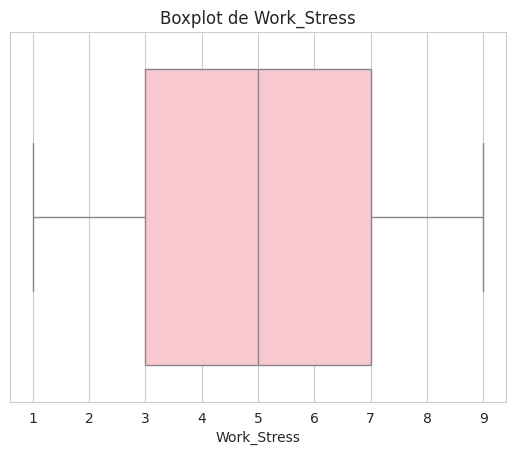

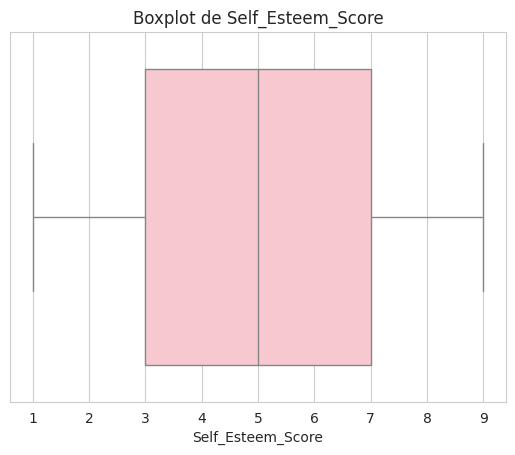

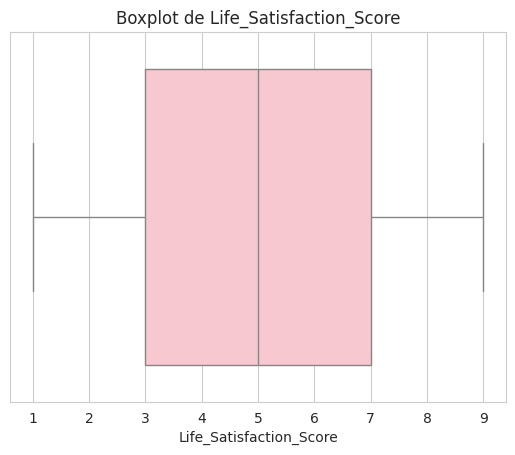

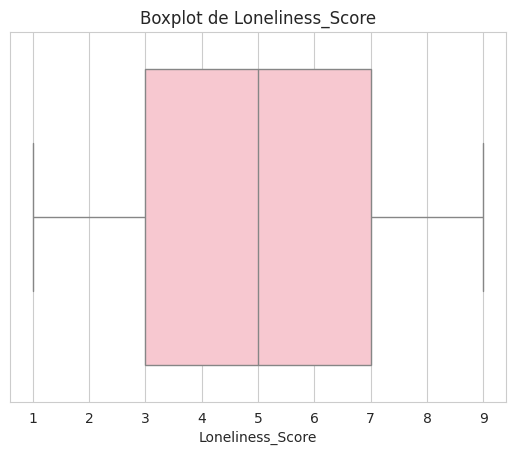

In [181]:
# Boxplots
for var in df_cuantitativas:
  sns.boxplot(data=df, x=var, color="pink")
  plt.title(f"Boxplot de {var}")
  plt.show()


#### Gr√°ficos de densidad

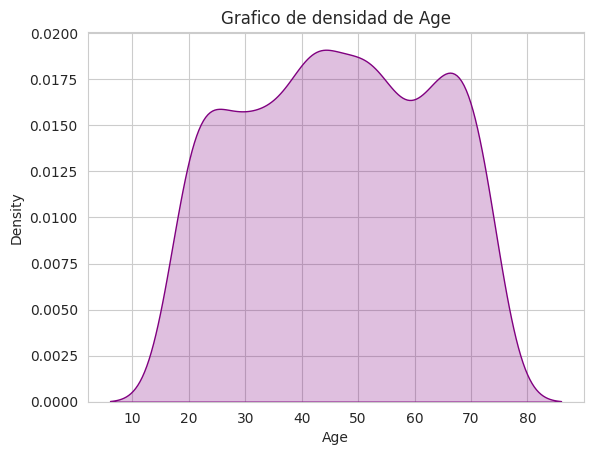

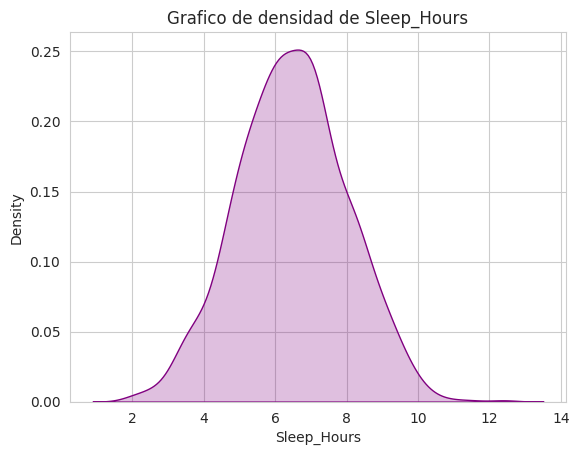

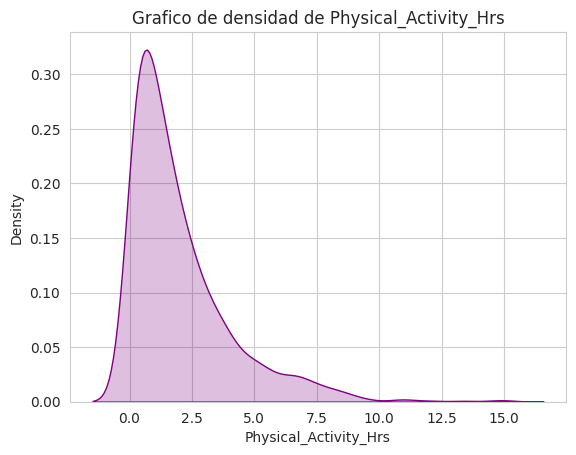

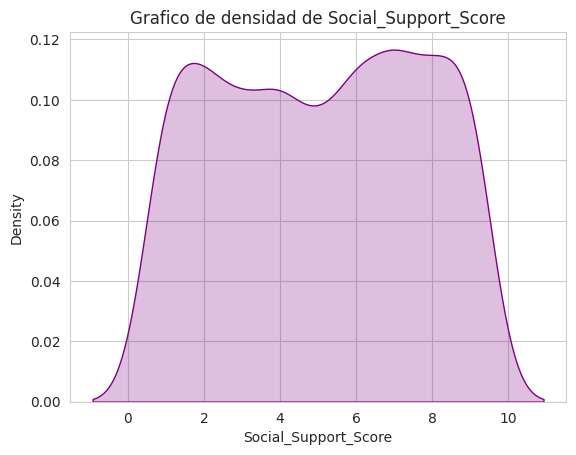

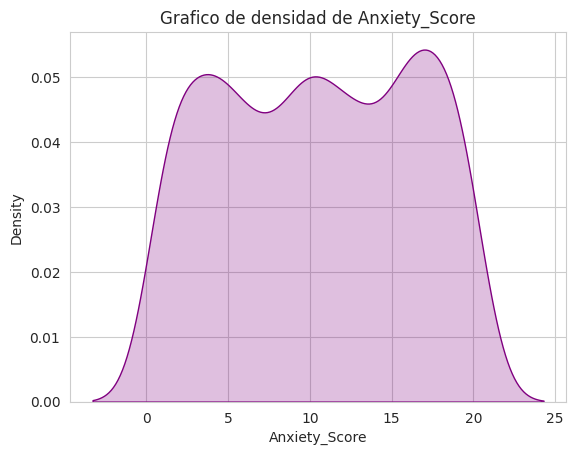

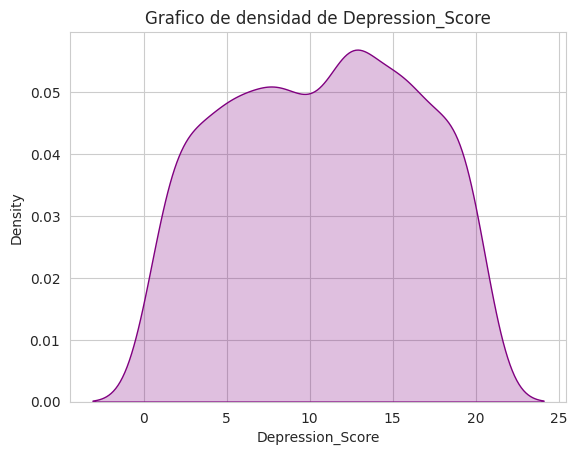

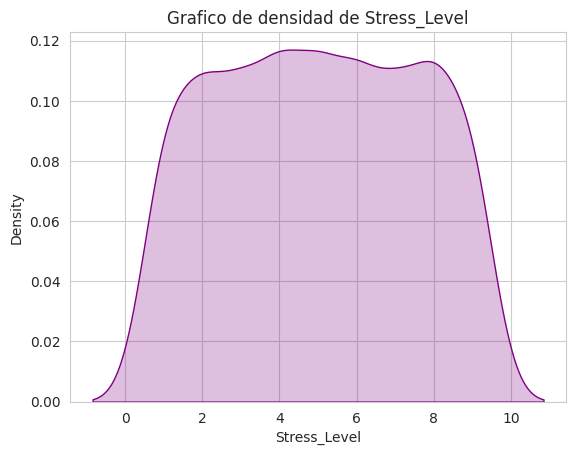

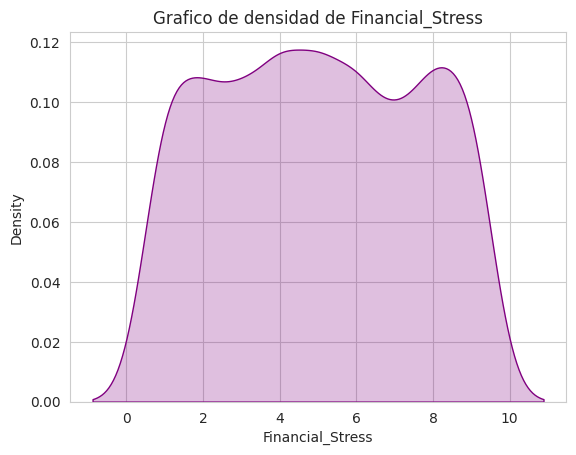

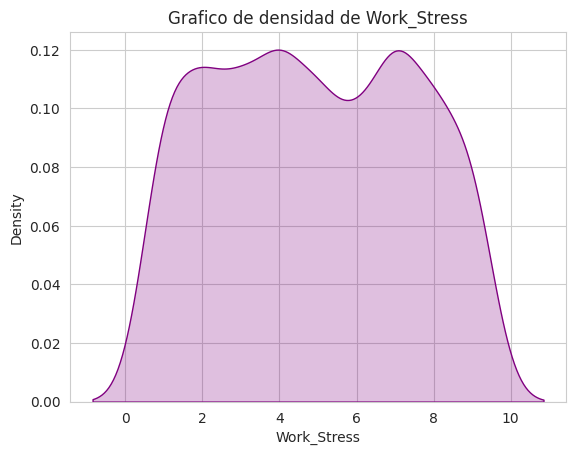

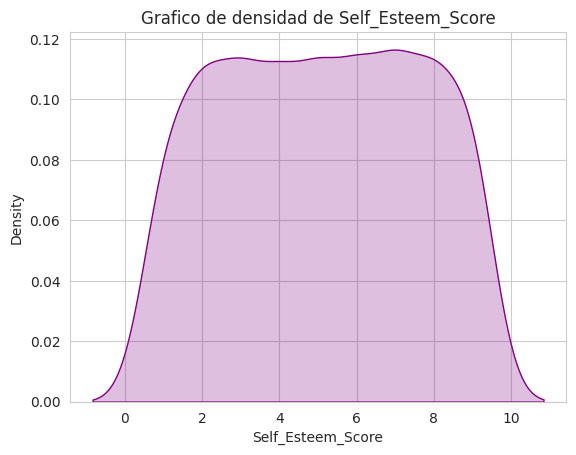

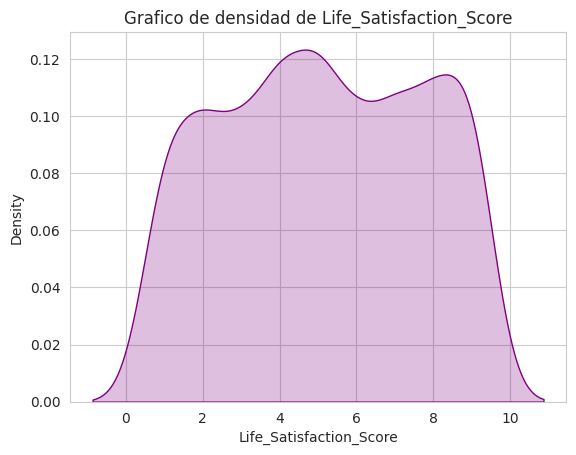

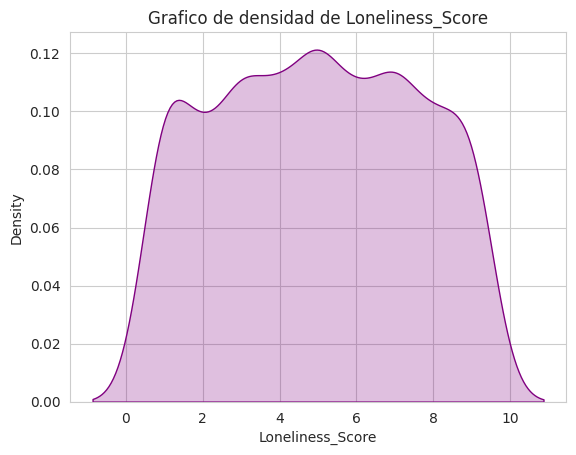

In [182]:
# Grafico de densidad (kdeplot)
for var in df_cuantitativas:
  sns.kdeplot(data=df, x=var, fill=True, color="purple")
  plt.title(f"Grafico de densidad de {var}")
  plt.show()

### Resumen de los diagramas

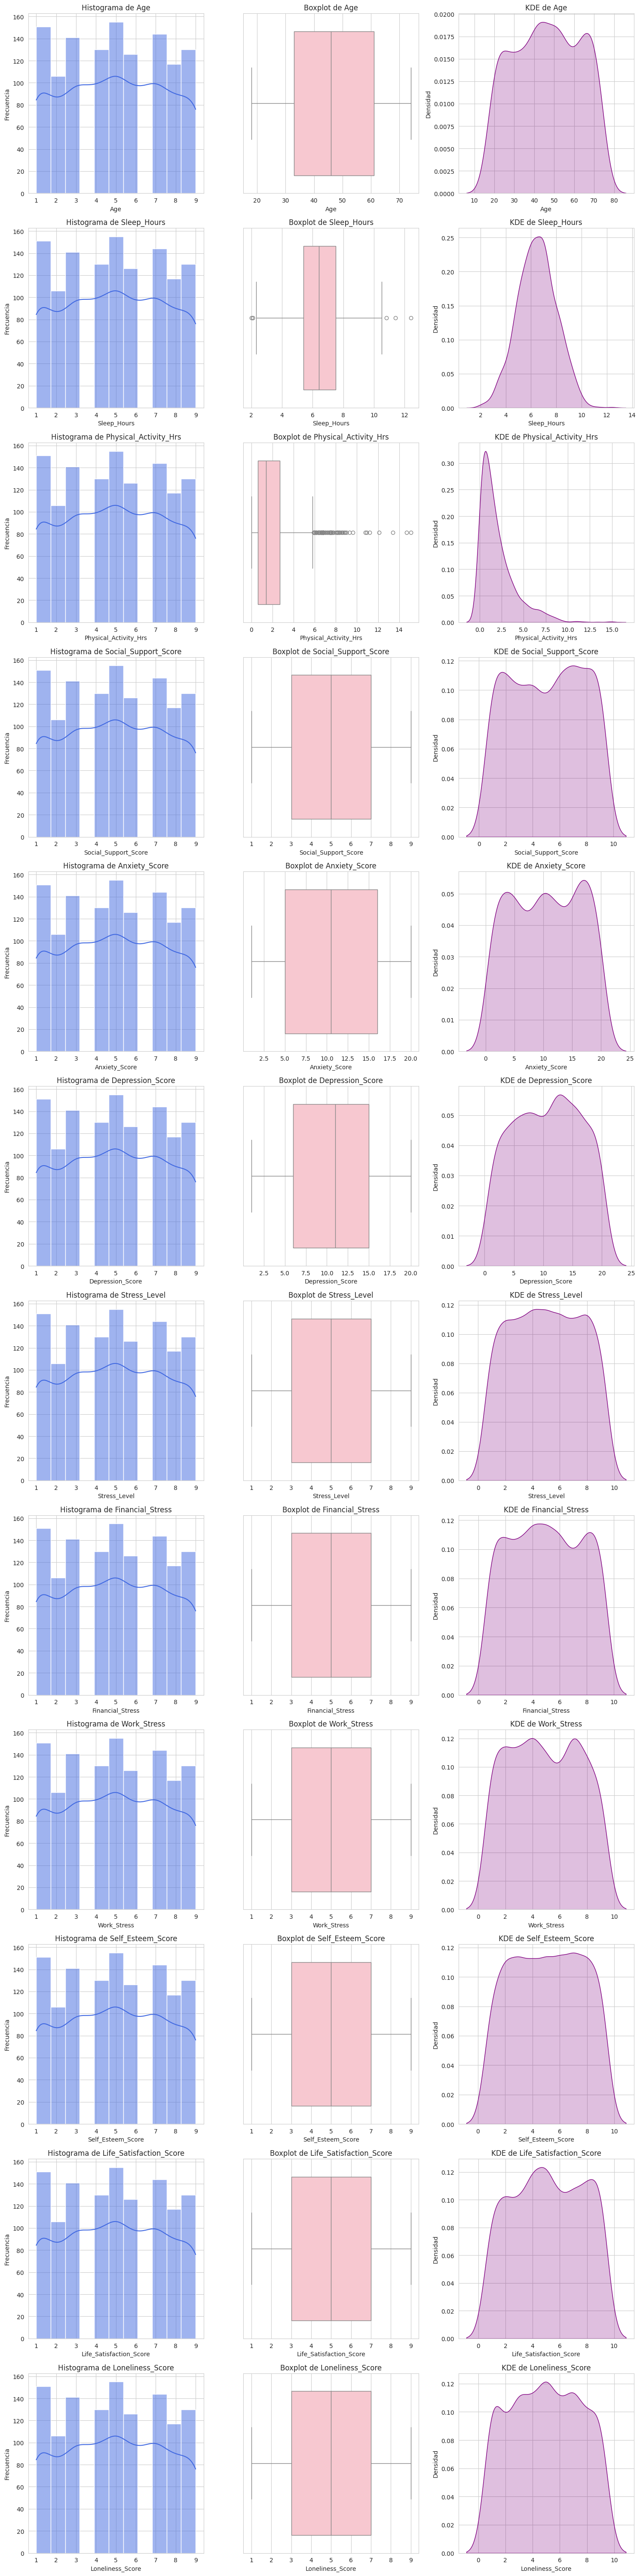

In [183]:
# Crear una figura con m√∫ltiples subgr√°ficos
fig, axes = plt.subplots(len(var_cuantitativas), 3, figsize=(15, 5 * len(var_cuantitativas)))

# Iterar sobre cada variable y graficarla en su fila correspondiente
for i, variable in enumerate(var_cuantitativas):
    # Histograma con KDE
    bins_sturges = int(1 + np.log2(len(df[var])))
    sns.histplot(data=df, x=var, bins=bins_sturges, kde=True, ax=axes[i,0], color="royalblue")
    axes[i, 0].set_title(f"Histograma de {variable}")
    axes[i, 0].set_xlabel(variable)
    axes[i, 0].set_ylabel("Frecuencia")

    # Boxplot
    sns.boxplot(data=df, x=variable, ax=axes[i, 1], color="pink")
    axes[i, 1].set_title(f"Boxplot de {variable}")
    axes[i, 1].set_xlabel(variable)

    # KDE (Gr√°fico de Densidad)
    sns.kdeplot(data=df, x=variable, fill=True, ax=axes[i, 2], color="purple")
    axes[i, 2].set_title(f"KDE de {variable}")
    axes[i, 2].set_xlabel(variable)
    axes[i, 2].set_ylabel("Densidad")

# Ajustar espacio entre gr√°ficos
plt.tight_layout()
plt.show()

### Verificaci√≥n de la condici√≥n de normalidad mediante la prueba de Shapiro-Wilk y la prueba de Kolmogorov-Smirnov

#### Prueba de Shapiro-Wilk

In [184]:
for var in df_cuantitativas:
  shapiro_test = stats.shapiro(df[var])
  print(f"\nPrueba de Shapiro-Wilk para {var}:")
  print(f"Estad√≠stico de prueba: {shapiro_test.statistic}")
  print(f"Valor p: {shapiro_test.pvalue}")
  if shapiro_test.pvalue < 0.05:
    print("‚ùå Se rechaza la normalidad (los datos NO son normales).")
  else:
    print("‚úÖ No se rechaza la normalidad (los datos podr√≠an ser normales).")


Prueba de Shapiro-Wilk para Age:
Estad√≠stico de prueba: 0.9555968159821586
Valor p: 1.3006577077089194e-18
‚ùå Se rechaza la normalidad (los datos NO son normales).

Prueba de Shapiro-Wilk para Sleep_Hours:
Estad√≠stico de prueba: 0.9984738852703454
Valor p: 0.3748155028103214
‚úÖ No se rechaza la normalidad (los datos podr√≠an ser normales).

Prueba de Shapiro-Wilk para Physical_Activity_Hrs:
Estad√≠stico de prueba: 0.8096328694712873
Valor p: 2.1793340082319239e-35
‚ùå Se rechaza la normalidad (los datos NO son normales).

Prueba de Shapiro-Wilk para Social_Support_Score:
Estad√≠stico de prueba: 0.9231820061895772
Valor p: 2.906709585168194e-24
‚ùå Se rechaza la normalidad (los datos NO son normales).

Prueba de Shapiro-Wilk para Anxiety_Score:
Estad√≠stico de prueba: 0.9420946290198597
Valor p: 3.0019694284220857e-21
‚ùå Se rechaza la normalidad (los datos NO son normales).

Prueba de Shapiro-Wilk para Depression_Score:
Estad√≠stico de prueba: 0.955242942859881
Valor p: 1.09158956

#### Prueba de Kolmogorov-Smirnov

In [185]:
for var in df_cuantitativas:
  mu = df[var].mean()
  sigma = df[var].std()
  k_test = stats.kstest(df[var], "norm", args=(mu, sigma))
  print(f"\nPrueba de Kolmogorov-Smirnov para {var} (comparada con N({mu:.2f}, {sigma:.2f})):")
  print(f"Estad√≠stico de prueba: {k_test.statistic}")
  print(f"Valor p: {k_test.pvalue}")
  if k_test.pvalue < 0.05:
    print("‚ùå Se rechaza la normalidad (los datos NO son normales).")
  else:
    print("‚úÖ No se rechaza la normalidad (los datos podr√≠an ser normales).")


Prueba de Kolmogorov-Smirnov para Age (comparada con N(46.32, 16.45)):
Estad√≠stico de prueba: 0.07143493952929447
Valor p: 9.045150469671737e-06
‚ùå Se rechaza la normalidad (los datos NO son normales).

Prueba de Kolmogorov-Smirnov para Sleep_Hours (comparada con N(6.47, 1.53)):
Estad√≠stico de prueba: 0.023854116913059276
Valor p: 0.4944757546875109
‚úÖ No se rechaza la normalidad (los datos podr√≠an ser normales).

Prueba de Kolmogorov-Smirnov para Physical_Activity_Hrs (comparada con N(2.01, 2.04)):
Estad√≠stico de prueba: 0.1624929800455967
Valor p: 3.7491882092913864e-28
‚ùå Se rechaza la normalidad (los datos NO son normales).

Prueba de Kolmogorov-Smirnov para Social_Support_Score (comparada con N(5.05, 2.65)):
Estad√≠stico de prueba: 0.12327016894592813
Valor p: 2.3757478996074023e-16
‚ùå Se rechaza la normalidad (los datos NO son normales).

Prueba de Kolmogorov-Smirnov para Anxiety_Score (comparada con N(10.47, 5.91)):
Estad√≠stico de prueba: 0.09857367735382294
Valor p: 1

### Resumen de la condici√≥n de normalidad mediante la prueba de Shapiro-Wilk y la prueba de Kolmogorov-Smirnov

In [186]:
# Lista para almacenar los resultados
resultados = []

for var in df_cuantitativas:
    data = df[var].dropna()  # Eliminar valores NaN si los hay

    # Prueba de Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(data)

    # Prueba de Kolmogorov-Smirnov (Comparando con distribuci√≥n normal est√°ndar)
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))

    # Evaluar normalidad
    normalidad = "S√≠" if shapiro_p > 0.05 and ks_p > 0.05 else "No"

    # Guardar en la lista
    resultados.append([var, shapiro_p, ks_p, normalidad])

# Crear DataFrame con los resultados
df_resultados = pd.DataFrame(resultados, columns=["Variable", "p-valor Shapiro-Wilk", "p-valor KS", "Distribuci√≥n Normal"])

# Mostrar el DataFrame
df_resultados

Variable  p-valor Shapiro-Wilk    p-valor KS  \
0                       Age          1.300658e-18  9.045150e-06   
1               Sleep_Hours          3.748155e-01  4.944758e-01   
2     Physical_Activity_Hrs          2.179334e-35  3.749188e-28   
3      Social_Support_Score          2.906710e-24  2.375748e-16   
4             Anxiety_Score          3.001969e-21  1.331842e-10   
5          Depression_Score          1.091590e-18  6.418366e-07   
6              Stress_Level          2.075141e-22  2.218819e-13   
7          Financial_Stress          4.466003e-23  1.899109e-12   
8               Work_Stress          9.692482e-23  1.001814e-16   
9         Self_Esteem_Score          1.966990e-22  1.349784e-14   
10  Life_Satisfaction_Score          8.424624e-23  6.004241e-14   
11         Loneliness_Score          1.400603e-22  1.048342e-13   

   Distribuci√≥n Normal  
0                   No  
1                   S√≠  
2                   No  
3                   No  
4                   No  
5                   No  
6                   No  
7                   No  
8                   No  
9                   No  
10                  No  
11                  No

A partir de los resultados de las pruebas de Shapiro-Wilk y Kolmogorov-Smirnov, podemos extraer las siguientes conclusiones:

1. **Variables que siguen una distribuci√≥n normal ‚úÖ**
  * Sleep_Hours (Horas de sue√±o): Ambos valores p son mayores a 0.05, por lo que no se puede rechazar la hip√≥tesis nula de normalidad.

  Este resultado era de esperarse, dado que en el apartado de *Visualizaci√≥n de Datos*, fue la √∫nica variable que presentaba esta forma.

2. **Variables que NO siguen una distribuci√≥n normal ‚ùå**

  Las siguientes variables tienen valores p extremadamente bajos (< 0.05) en ambas pruebas, lo que indica que no siguen una distribuci√≥n normal:

  * Age (Edad)
  * Physical_Activity_Hrs (Horas de actividad f√≠sica)
  * Social_Support_Score (Puntaje de apoyo social)
  * Anxiety_Score (Puntaje de ansiedad)
  * Depression_Score (Puntaje de depresi√≥n)
  * Stress_Level (Nivel de estr√©s)
  * Financial_Stress (Estr√©s financiero)
  * Work_Stress (Estr√©s laboral)
  * Self_Esteem_Score (Autoestima)
  * Life_Satisfaction_Score (Satisfacci√≥n con la vida)
  * Loneliness_Score (Soledad)

**Caso especial de Physical_Activity_Hrs**

Esta variable tiene una distribuci√≥n aparente conocida, parece ser exponencial o lognormal. Comprobemos si es alguna de ellas:

In [187]:
import numpy as np
import scipy.stats as stats

# Asegurar que los datos sean num√©ricos y sin valores NaN
data = df_cuantitativas["Physical_Activity_Hrs"].dropna()  # Eliminar NaN

# Verificar si hay valores menores o iguales a 0
if (data <= 0).any():
    print("‚ö†Ô∏è Advertencia: Se encontraron valores menores o iguales a 0. Se aplicar√° una transformaci√≥n.")
    data = data + abs(data.min()) + 1e-6  # Transformar valores negativos o ceros

# Ajuste de la distribuci√≥n exponencial
exp_params = stats.expon.fit(data)
ks_stat_exp, ks_p_exp = stats.kstest(data, 'expon', args=exp_params)

# Ajuste de la distribuci√≥n lognormal
lognorm_params = stats.lognorm.fit(data, floc=0)  # Asegurar loc=0
ks_stat_lognorm, ks_p_lognorm = stats.kstest(data, 'lognorm', args=lognorm_params)

# Resultados
print("üìå **Prueba KS para distribuci√≥n Exponencial:**")
print(f"KS-Statistic: {ks_stat_exp:.4f}, p-value: {ks_p_exp:.4f}")

print("\nüìå **Prueba KS para distribuci√≥n Lognormal:**")
print(f"KS-Statistic: {ks_stat_lognorm:.4f}, p-value: {ks_p_lognorm:.4f}")

# Interpretaci√≥n
if ks_p_exp > 0.05:
    print("\n‚úÖ La variable podr√≠a seguir una distribuci√≥n Exponencial.")
else:
    print("\n‚ùå La variable NO sigue una distribuci√≥n Exponencial.")

if ks_p_lognorm > 0.05:
    print("\n‚úÖ La variable podr√≠a seguir una distribuci√≥n Lognormal.")
else:
    print("\n‚ùå La variable NO sigue una distribuci√≥n Lognormal.")


‚ö†Ô∏è Advertencia: Se encontraron valores menores o iguales a 0. Se aplicar√° una transformaci√≥n.
üìå **Prueba KS para distribuci√≥n Exponencial:**
KS-Statistic: 0.0270, p-value: 0.3412

üìå **Prueba KS para distribuci√≥n Lognormal:**
KS-Statistic: 0.2003, p-value: 0.0000

‚úÖ La variable podr√≠a seguir una distribuci√≥n Exponencial.

‚ùå La variable NO sigue una distribuci√≥n Lognormal.


Comprobamos que la distibuci√≥n que sigue es una exponencial.

## An√°lisis descriptivo de variables categ√≥ricas

### Selecci√≥n de al menos 3 variables categ√≥ricas

In [188]:
df.head()

Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  ...  Chronic_Illnesses  Medication_Use  \
0                 2             9  ...                  0           Never   
1                 7             6  ...                  0           Never   
2                13             8  ...                  0           Never   
3                 3             4  ...                  1           Never   
4                15             3  ...                  0           Never   

  Therapy  Meditation  Substance_Use Financial_Stress  Work_Stress  \
0       0           1          Never                4            3   
1       1           0          Never                1            4   
2       0           1          Never                8            7   
3       0           0          Never                7            4   
4       1           1       Frequent                8            9   

   Self_Esteem_Score  Life_Satisfaction_Score  Loneliness_Score  
0                  7                        5                 1  
1                  7                        4                 6  
2                  8                        1                 1  
3                  8                        4                 4  
4                  5                        7                 7  

[5 rows x 21 columns]

In [189]:
var_categoricas = ["Gender", "Education_Level", "Employment_Status", "Medication_Use", "Substance_Use"]
df_categoricas = df[var_categoricas]
df_categoricas.head()

Gender Education_Level Employment_Status Medication_Use Substance_Use
0    Male      Bachelor's        Unemployed          Never         Never
1  Female      Bachelor's           Retired          Never         Never
2  Female        Master's          Employed          Never         Never
3  Female     High School        Unemployed          Never         Never
4  Female      Bachelor's           Retired          Never      Frequent

### C√°lculo de frecuencias absolutas y relativas

In [190]:
frecuencia_absoluta = df_categoricas.value_counts()
frecuencia_relativa = df_categoricas.value_counts(normalize=True)

frecuencia = pd.DataFrame({
    "Frecuencia Absoluta": frecuencia_absoluta,
    "Frecuencia Relativa": frecuencia_relativa
})

frecuencia

Frecuencia Absoluta  \
Gender     Education_Level Employment_Status Medication_Use Substance_Use                        
Male       High School     Retired           Never          Never                           20   
Female     Bachelor's      Employed          Never          Never                           19   
Male       Other           Unemployed        Never          Never                           18   
Female     PhD             Unemployed        Never          Never                           18   
Male       PhD             Employed          Never          Never                           17   
...                                                                                        ...   
Non-Binary Other           Retired           Never          Never                            1   
                           Employed          Never          Never                            1   
                                                            Frequent                         1   
Other      PhD             Student           Never          Never                            1   
Female     Bachelor's      Retired           Occasional     Never                            1   

                                                                           Frecuencia Relativa  
Gender     Education_Level Employment_Status Medication_Use Substance_Use                       
Male       High School     Retired           Never          Never                     0.016667  
Female     Bachelor's      Employed          Never          Never                     0.015833  
Male       Other           Unemployed        Never          Never                     0.015000  
Female     PhD             Unemployed        Never          Never                     0.015000  
Male       PhD             Employed          Never          Never                     0.014167  
...                                                                                        ...  
Non-Binary Other           Retired           Never          Never                     0.000833  
                           Employed          Never          Never                     0.000833  
                                                            Frequent                  0.000833  
Other      PhD             Student           Never          Never                     0.000833  
Female     Bachelor's      Retired           Occasional     Never                     0.000833  

[345 rows x 2 columns]

In [191]:
for col in df_categoricas:
    print(f"\nFrecuencias para \n{col}:")
    print(f"\nFrecuencia Absoluta: \n{df[col].value_counts()}")
    print(f"\nFrecuencia Relativa: \n{df[col].value_counts(normalize=True)}")


Frecuencias para 
Gender:

Frecuencia Absoluta: 
Gender
Female        569
Male          520
Non-Binary     90
Other          21
Name: count, dtype: int64

Frecuencia Relativa: 
Gender
Female        0.474167
Male          0.433333
Non-Binary    0.075000
Other         0.017500
Name: proportion, dtype: float64

Frecuencias para 
Education_Level:

Frecuencia Absoluta: 
Education_Level
PhD            262
High School    242
Master's       242
Other          240
Bachelor's     214
Name: count, dtype: int64

Frecuencia Relativa: 
Education_Level
PhD            0.218333
High School    0.201667
Master's       0.201667
Other          0.200000
Bachelor's     0.178333
Name: proportion, dtype: float64

Frecuencias para 
Employment_Status:

Frecuencia Absoluta: 
Employment_Status
Employed      320
Student       310
Unemployed    288
Retired       282
Name: count, dtype: int64

Frecuencia Relativa: 
Employment_Status
Employed      0.266667
Student       0.258333
Unemployed    0.240000
Retired       0

### **Conclusiones a partir de las frecuencias**  


1.   **G√©nero (Gender)**  
  - **Mayor√≠a de participantes son mujeres (47.42%)**, seguidas por hombres (43.33%).  
  - **Las personas no binarias (7.5%) y "Other" (1.75%) representan una minor√≠a** en la muestra.  
  - **Posible sesgo de g√©nero**, dependiendo del prop√≥sito del estudio.  

2. **Nivel Educativo (Education Level)**  
  - **El grupo m√°s grande tiene un doctorado (21.83%)**, lo cual es inusual en la mayor√≠a de estudios generales.  
  - **Los niveles educativos est√°n relativamente equilibrados**, con porcentajes similares entre High School, Master's y "Other" (~20% cada uno).  
  - **Los que tienen un t√≠tulo universitario (Bachelor's) son el grupo m√°s bajo (17.83%)**, lo que podr√≠a indicar una poblaci√≥n m√°s inclinada hacia la educaci√≥n avanzada.  

3. **Estado Laboral (Employment Status)**  
  - **La mayor√≠a est√° empleada (26.67%) o es estudiante (25.83%)**, lo que indica una poblaci√≥n econ√≥micamente activa.  
  - **Desempleados (24%) y retirados (23.5%) tienen proporciones similares**, lo que sugiere una distribuci√≥n equilibrada.  

4. **Uso de Medicamentos (Medication Use)**  
  - **La mayor√≠a (62.25%) nunca usa medicamentos**, lo cual puede indicar una poblaci√≥n mayormente sana.  
  - **El uso regular (19.83%) y ocasional (17.92%) es relativamente bajo**, pero a√∫n significativo.  

5. **Uso de Sustancias (Substance Use)**  
  - **Un 69.5% de la muestra nunca usa sustancias**, lo que indica una baja prevalencia de consumo.  
  - **El consumo ocasional (20.17%) es m√°s frecuente que el frecuente (10.33%)**, lo que sugiere que una parte de la poblaci√≥n consume de manera no habitual.  

**Posibles Interpretaciones**  
1. **Educaci√≥n avanzada**: Un porcentaje alto de participantes tiene doctorado o maestr√≠a.  
2. **Poblaci√≥n activa**: La mayor√≠a est√° empleada o estudiando.  
3. **Bajo consumo de sustancias**: La mayor√≠a no usa sustancias ni medicamentos regularmente.  
4. **Diferencias de g√©nero**: Hay m√°s mujeres que hombres en la muestra.

### Visualizaci√≥n de los datos: gr√°ficos de barras, diagramas de tarta y gr√°ficos de mosaico.

#### Gr√°ficos de barras

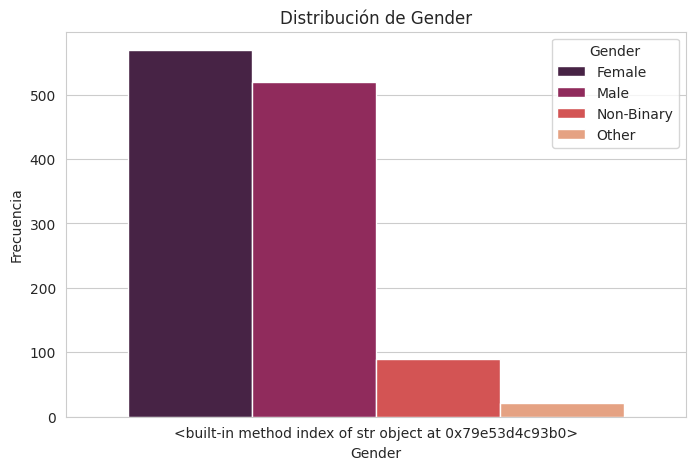

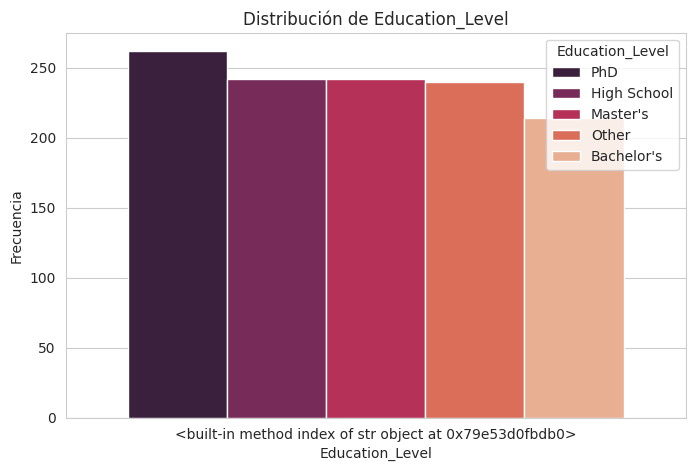

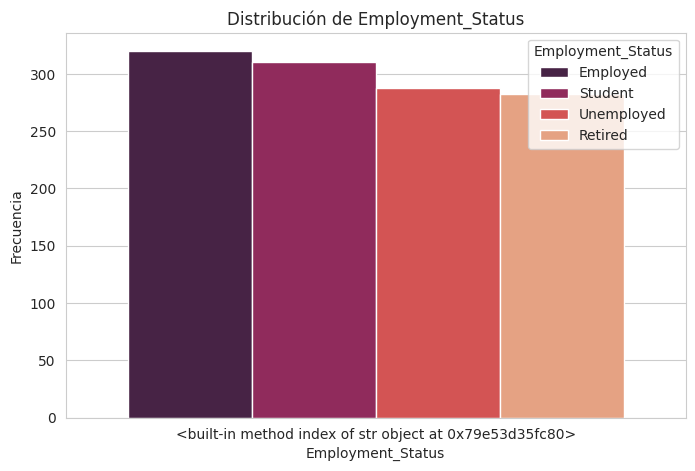

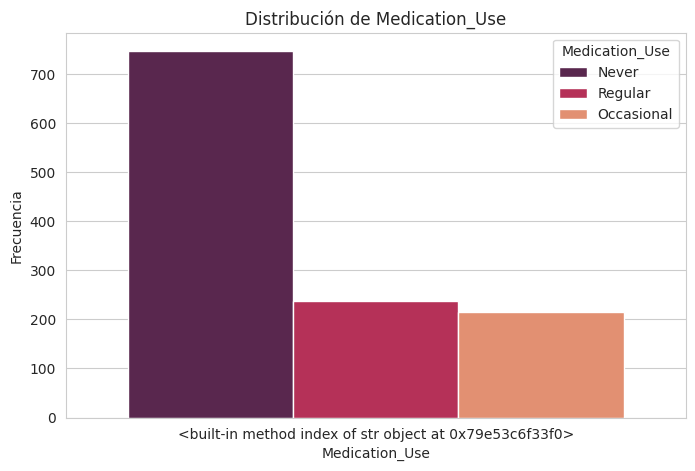

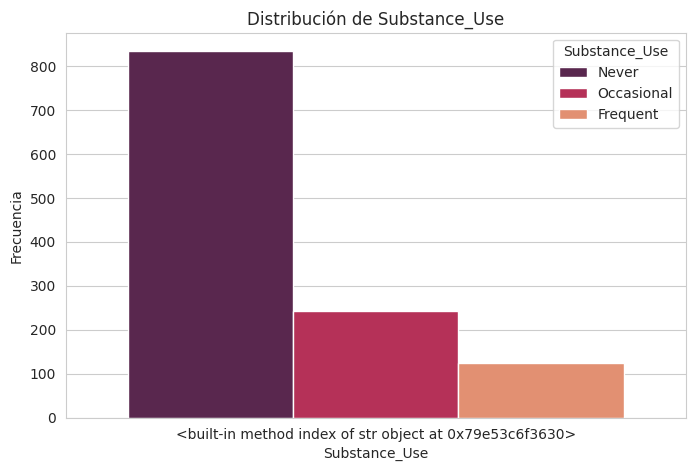

In [192]:
for var in df_categoricas:
    var_counts = df[var].value_counts()  # Contar categor√≠as
    plt.figure(figsize=(8, 5))
    sns.barplot(x=var.index, y=var_counts.values, palette="rocket", hue=var_counts.index)
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.title(f"Distribuci√≥n de {var}")
    plt.show()



#### Diagramas de tarta

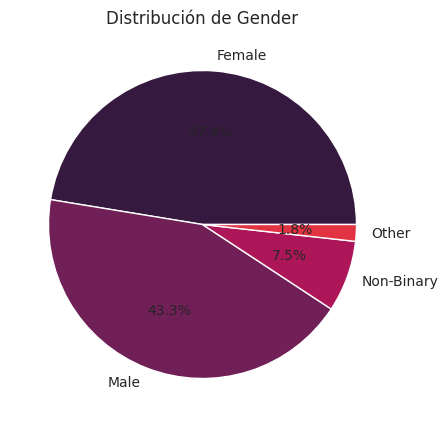

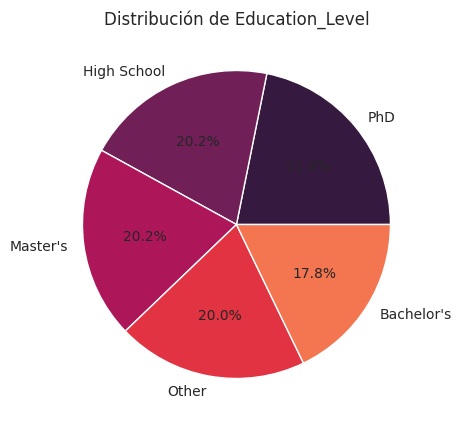

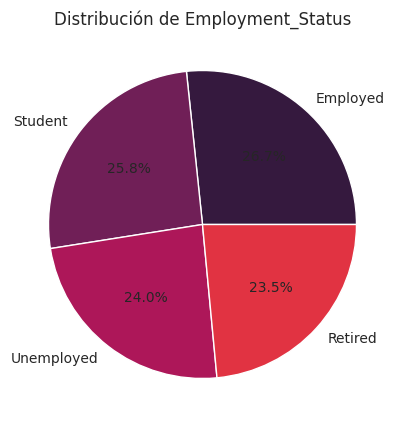

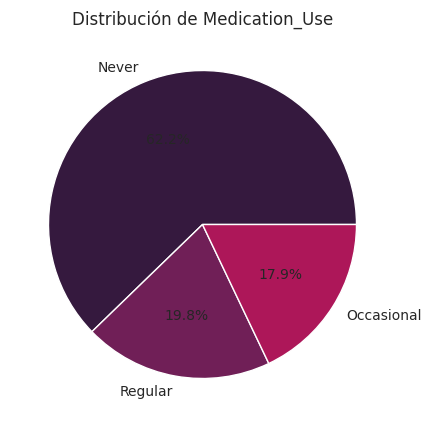

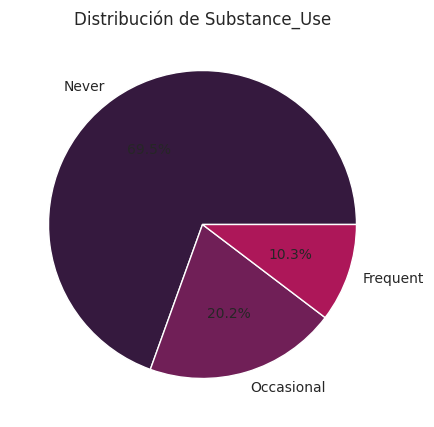

In [193]:
for var in df_categoricas:
    var_counts = df[var].value_counts()  # Contar categor√≠as
    plt.figure(figsize=(8, 5))
    plt.pie(var_counts, labels=var_counts.index,autopct='%1.1f%%', colors=sns.color_palette("rocket"))
    plt.title(f"Distribuci√≥n de {var}")
    plt.show()

#### Gr√°fico treemap

Tom√© la decisi√≥n de hacer este tipo de gr√°ficos en vez de un gr√°fico de Mosaico, dado que no veo que sea muy √∫til o se apreci√© adecuadamente los datos.

##### Gr√°fico de Mosaico

<Figure size 2000x1200 with 0 Axes>

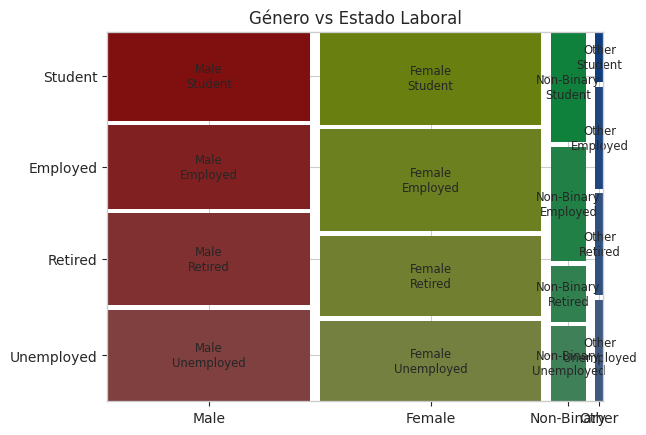

<Figure size 800x800 with 0 Axes>

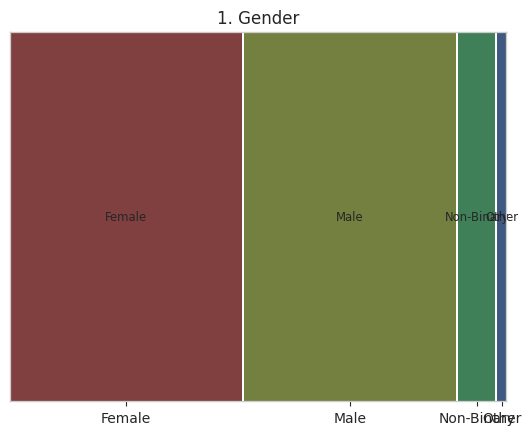

In [194]:
# Gr√°fico de mosaico para Gender vs Employment_Status
plt.figure(figsize=(20,12))
mosaic(df, ['Gender', 'Employment_Status'], title="G√©nero vs Estado Laboral", gap=0.02)
plt.show()

def mosaico(data, nombre, n):
    plt.figure(figsize=(8, 8))
    mosaic(data.value_counts(), title=f"{n}. {nombre}")
    plt.show()

mosaico(df_categoricas['Gender'], 'Gender', 1)


##### Treemap

In [195]:
# Crear una funci√≥n ya que har√© 2 treemaps usando Plotly ya que me gusta que sea interactivo

def crear_treemap(df, nivel_1, nivel_2, nivel_3):
    '''
    df (DataFrame): DataFrame que contiene los datos.
    nivel_1 (str): Nombre del nivel 1 del treemap.
    nivel_2 (str): Nombre del nivel 2 del treemap.
    nivel_3 (str): Nombre del nivel 3 del treemap.
    '''
    # Crear tabla de frecuencias
    df_freq = df.groupby([nivel_1, nivel_2, nivel_3]).size().reset_index(name="count")

    # Calcular porcentaje
    df_freq["percentage"] = df_freq["count"] / df_freq["count"].sum() * 100

    # Crear treemap con porcentaje en la etiqueta
    fig = px.treemap(df_freq,
                     path=[nivel_1, nivel_2, nivel_3],
                     values="count",
                     title=f"Treemap por {nivel_1}, {nivel_2} y {nivel_3}",
                     hover_data={"percentage": True})

    # Mostrar valores en etiquetas
    fig.update_traces(texttemplate="%{label}<br>%{value} (%{customdata[0]:.1f}%)")

    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
    fig.show()


In [196]:
crear_treemap(df_categoricas, "Gender", "Medication_Use", "Substance_Use")

In [197]:
crear_treemap(df_categoricas, "Gender", "Education_Level", "Employment_Status")

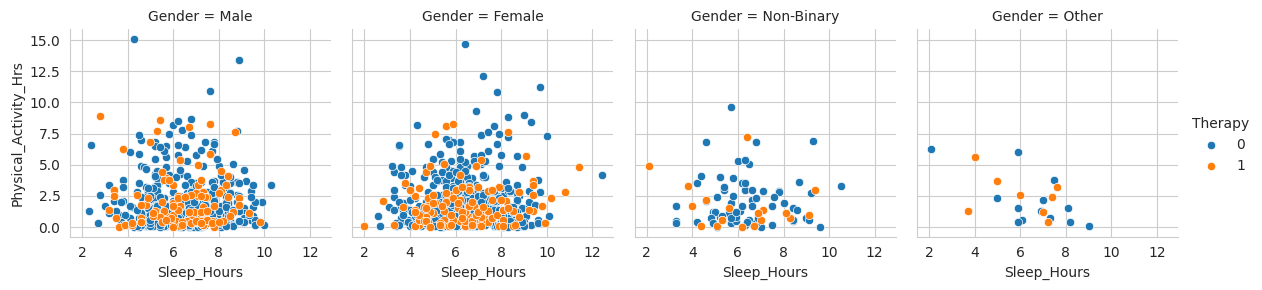

In [198]:
g = sns.FacetGrid(df, col="Gender", hue="Therapy")
g.map(sns.scatterplot, "Sleep_Hours", "Physical_Activity_Hrs")
g.add_legend()
plt.show()

### An√°lisis de la relaci√≥n entre variables categ√≥ricas mediante tablas de contingencia y pruebas de Chi-cuadrado

In [199]:
def chi_square_test(df, var1, var2, alpha=0.05):
    '''
    Realiza una prueba de Chi-cuadrado para evaluar la relaci√≥n entre dos variables categ√≥ricas.
    Par√°metros:
        df (DataFrame): DataFrame con los datos.
        var1 (str): Nombre de la primera variable categ√≥rica.
        var2 (str): Nombre de la segunda variable categ√≥rica.
        alpha (float): Nivel de significancia (por defecto 0.05).
    '''
    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df[var1], df[var2])
    print(f"\nTabla de Contingencia entre {var1} y {var2}:")
    print(tabla_contingencia)

    # Prueba de Chi-cuadrado
    chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

    # Mostrar resultados
    print(f"\nPrueba de Chi-cuadrado entre {var1} y {var2}:")
    print(f" - Chi-cuadrado: {chi2:.4f}")
    print(f" - p-valor: {p:.4f}")
    print(f" - Grados de libertad: {dof}")

    # Evaluar relaci√≥n significativa
    if p < alpha:
        print("\n‚úÖConclusi√≥n: Hay una relaci√≥n significativa entre las variables.")
    else:
        print("\n‚ùåConclusi√≥n: No hay evidencia suficiente para afirmar que hay relaci√≥n.")

In [200]:
chi_square_test(df_categoricas, "Gender", "Employment_Status")
chi_square_test(df_categoricas, "Gender", "Education_Level")
chi_square_test(df_categoricas, "Gender", "Medication_Use")
chi_square_test(df_categoricas, "Gender", "Substance_Use")
chi_square_test(df_categoricas, "Medication_Use", "Employment_Status")
chi_square_test(df_categoricas, "Medication_Use", "Substance_Use")



Tabla de Contingencia entre Gender y Employment_Status:
Employment_Status  Employed  Retired  Student  Unemployed
Gender                                                   
Female                  163      128      149         129
Male                    122      134      130         134
Non-Binary               29       14       28          19
Other                     6        6        3           6

Prueba de Chi-cuadrado entre Gender y Employment_Status:
 - Chi-cuadrado: 11.7549
 - p-valor: 0.2275
 - Grados de libertad: 9

‚ùåConclusi√≥n: No hay evidencia suficiente para afirmar que hay relaci√≥n.

Tabla de Contingencia entre Gender y Education_Level:
Education_Level  Bachelor's  High School  Master's  Other  PhD
Gender                                                        
Female                   96          124       114    116  119
Male                     97           95       106    103  119
Non-Binary               19           16        16     19   20
Other                

#### Gr√°fico de Coorelacion

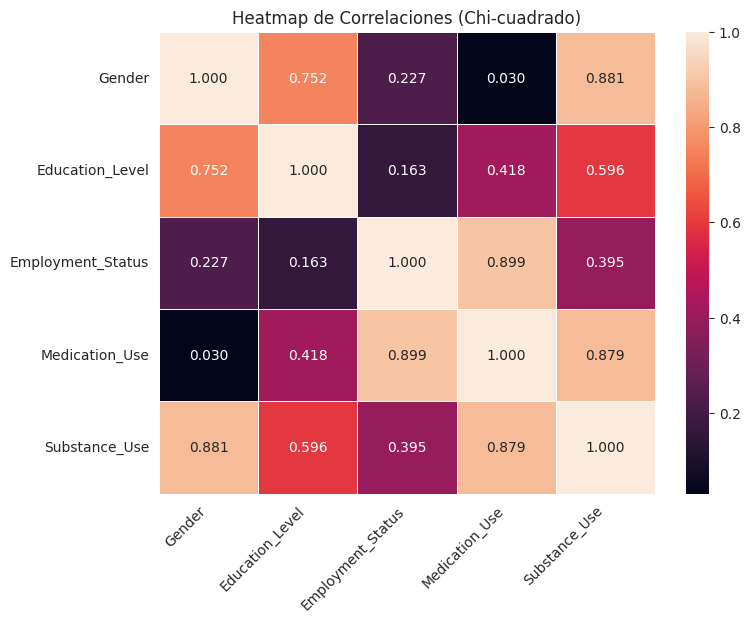

In [201]:
def chi_square_correlation_heatmap(df, alpha=0.05):
    """
    Crea un heatmap de correlaciones entre variables categ√≥ricas usando la prueba de Chi-cuadrado.

    Par√°metros:
        df (DataFrame): DataFrame con variables categ√≥ricas.
        alpha (float): Nivel de significancia para considerar relaci√≥n (default 0.05).
    """
    variables = df.columns
    n = len(variables)

    # Crear matriz vac√≠a para los p-valores
    p_values = np.ones((n, n))

    # Calcular el p-valor para cada par de variables categ√≥ricas
    for i in range(n):
        for j in range(i+1, n):  # Evitar repeticiones (matriz triangular)
            tabla_contingencia = pd.crosstab(df[variables[i]], df[variables[j]])
            chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)
            p_values[i, j] = p
            p_values[j, i] = p  # Rellenar la otra mitad de la matriz

    # Convertir en DataFrame para Seaborn
    p_values_df = pd.DataFrame(p_values, index=variables, columns=variables)

    # Crear el heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(p_values_df, annot=True, cmap="rocket", fmt=".3f", linewidths=0.5, cbar=True)

    # Personalizar etiquetas
    plt.title("Heatmap de Correlaciones (Chi-cuadrado)")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)

    plt.show()

chi_square_correlation_heatmap(df_categoricas)


#### Fun fact


Parece que la mayor√≠a de las variables no tienen relaciones significativas entre s√≠, excepto Gender y Medication_Use, que s√≠ muestran una asociaci√≥n.

Algunas observaciones:

* A pesar de que **Gender** y **Education_Level** tienen una correlaci√≥n alta en el heatmap (0.752), el p-valor en la prueba de chi-cuadrado indica que no hay evidencia suficiente para afirmar una relaci√≥n significativa.

* **Employment_Status** y **Medication_Use** tienen una correlaci√≥n muy alta en el heatmap (0.899), pero la prueba de chi-cuadrado no muestra una relaci√≥n significativa. Esto podr√≠a indicar que la correlaci√≥n es fuerte, pero no estad√≠sticamente significativa en este caso.

* **Substance_Use** y **Gender** tienen una correlaci√≥n muy alta (0.881), pero el chi-cuadrado tampoco respalda una relaci√≥n significativa.

Lo que pasa es que el **heatmap muestra correlaciones entre variables categ√≥ricas**, pero la prueba de **Chi-cuadrado mide significancia estad√≠stica**, lo cual no es exactamente lo mismo. Vamos a desglosarlo:

1.  **El heatmap de correlaciones** (probablemente basado en el coeficiente de Cram√©r V o una variante de Phi) **indica la fuerza de la relaci√≥n** entre variables. Es decir, qu√© tan asociadas est√°n. Pero **no nos dice si esa asociaci√≥n es significativa** desde el punto de vista estad√≠stico.  
2.  **El Chi-cuadrado, en cambio, nos dice si la relaci√≥n encontrada en los datos es lo suficientemente fuerte como para no ser atribuida al azar**. Es decir, si la relaci√≥n tiene significancia estad√≠stica.  

Ahora, ¬øpor qu√© algunas correlaciones altas en el heatmap no son significativas en Chi-cuadrado?  

- **Tama√±o de muestra:** Si hay pocos datos, el Chi-cuadrado puede no detectar relaciones como significativas aunque la correlaci√≥n parezca fuerte.  
- **Distribuci√≥n de los datos:** Si los valores en la tabla de contingencia est√°n muy desbalanceados (por ejemplo, la mayor√≠a de los datos en una sola categor√≠a), la prueba de Chi puede no encontrar significancia.  
- **N√∫mero de categor√≠as:** Muchas categor√≠as con pocos datos en cada celda pueden hacer que la prueba de Chi-cuadrado pierda poder.  

### C√°lculo e interpretaci√≥n de medidas de asociaci√≥n como el coeficiente de contingencia y el Cram√©r's V.

In [202]:
def association_measures(df, var1, var2):
    '''
    Calcula las medidas de asociaci√≥n entre dos variables categ√≥ricas:
    - Coeficiente de Contingencia (C)
    - Cram√©r's V
    Par√°metros:
        df (DataFrame): DataFrame con los datos.
        var1 (str): Nombre de la primera variable categ√≥rica.
        var2 (str): Nombre de la segunda variable categ√≥rica.
    '''
    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df[var1], df[var2])

    # Prueba de Chi-cuadrado
    chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

    # Tama√±o de la muestra
    n = np.sum(tabla_contingencia.values)

    # Coeficiente de Contingencia
    C = np.sqrt(chi2 / (chi2 + n))

    # Cram√©r's V
    k = min(tabla_contingencia.shape)  # M√≠nimo entre filas y columnas
    V = np.sqrt(chi2 / (n * (k - 1)))

    # Mostrar resultados
    print(f"\nMedidas de Asociaci√≥n entre {var1} y {var2}:")
    print(f" - Coeficiente de Contingencia (C): {C:.4f}")
    print(f" - Cram√©r's V: {V:.4f}")

    # Interpretaci√≥n de Cram√©r‚Äôs V
    if V < 0.10:
        interpretacion = "Relaci√≥n muy d√©bil"
    elif V < 0.30:
        interpretacion = "Relaci√≥n d√©bil"
    elif V < 0.50:
        interpretacion = "Relaci√≥n moderada"
    else:
        interpretacion = "Relaci√≥n fuerte"

    print(f"üîé Interpretaci√≥n de Cram√©r‚Äôs V: {interpretacion}")


In [203]:
association_measures(df_categoricas, "Gender", "Employment_Status")
association_measures(df_categoricas, "Gender", "Education_Level")
association_measures(df_categoricas, "Gender", "Medication_Use")
association_measures(df_categoricas, "Gender", "Substance_Use")
association_measures(df_categoricas, "Medication_Use", "Employment_Status")
association_measures(df_categoricas, "Medication_Use", "Substance_Use")


Medidas de Asociaci√≥n entre Gender y Employment_Status:
 - Coeficiente de Contingencia (C): 0.0985
 - Cram√©r's V: 0.0571
üîé Interpretaci√≥n de Cram√©r‚Äôs V: Relaci√≥n muy d√©bil

Medidas de Asociaci√≥n entre Gender y Education_Level:
 - Coeficiente de Contingencia (C): 0.0834
 - Cram√©r's V: 0.0483
üîé Interpretaci√≥n de Cram√©r‚Äôs V: Relaci√≥n muy d√©bil

Medidas de Asociaci√≥n entre Gender y Medication_Use:
 - Coeficiente de Contingencia (C): 0.1072
 - Cram√©r's V: 0.0762
üîé Interpretaci√≥n de Cram√©r‚Äôs V: Relaci√≥n muy d√©bil

Medidas de Asociaci√≥n entre Gender y Substance_Use:
 - Coeficiente de Contingencia (C): 0.0446
 - Cram√©r's V: 0.0315
üîé Interpretaci√≥n de Cram√©r‚Äôs V: Relaci√≥n muy d√©bil

Medidas de Asociaci√≥n entre Medication_Use y Employment_Status:
 - Coeficiente de Contingencia (C): 0.0429
 - Cram√©r's V: 0.0304
üîé Interpretaci√≥n de Cram√©r‚Äôs V: Relaci√≥n muy d√©bil

Medidas de Asociaci√≥n entre Medication_Use y Substance_Use:
 - Coeficiente de C

## An√°lisis descriptivo de variables binarias

### Selecci√≥n de al menos 3 variables binarias

In [204]:
var_binarias = ["Chronic_Illnesses", "Therapy", "Meditation", "Family_History_Mental_Illness"]
df_binarias = df[var_binarias]
df_binarias.head()

Chronic_Illnesses  Therapy  Meditation  Family_History_Mental_Illness
0                  0        0           1                              0
1                  0        1           0                              0
2                  0        0           1                              0
3                  1        0           0                              1
4                  0        1           1                              0

### C√°lculo de proporciones y frecuencias

In [205]:
# Calcular frecuencia absoluta
frecuencia = df_binarias.apply(lambda x: x.value_counts())
#print("Frecuencia absoluta:")
#print(frecuencia)

# Calcular proporci√≥n (%)
proporcion = df_binarias.apply(lambda x: x.value_counts(normalize=True) * 100)
#print("\nProporci√≥n (%):")
#print(proporcion)

resumen = pd.concat([frecuencia, proporcion], axis=1, keys=["Frecuencia", "Proporci√≥n (%)"])
resumen

Frecuencia                                                   \
  Chronic_Illnesses Therapy Meditation Family_History_Mental_Illness   
0               879     948        721                           818   
1               321     252        479                           382   

     Proporci√≥n (%)                                                   
  Chronic_Illnesses Therapy Meditation Family_History_Mental_Illness  
0             73.25    79.0  60.083333                     68.166667  
1             26.75    21.0  39.916667                     31.833333

#### Conclusiones

A partir de estos datos, podemos sacar varias conclusiones:  

1. **"Chronic_Illnesses" (Enfermedades Cr√≥nicas)**  
   - El **73.25%** de las personas **no** tiene enfermedades cr√≥nicas, mientras que el **26.75%** s√≠ las tiene.  
   - Indica que la mayor√≠a de la poblaci√≥n en este dataset no sufre de enfermedades cr√≥nicas.  

2. **"Therapy" (Terapia psicol√≥gica)**  
   - Solo el **21%** ha asistido a terapia, mientras que el **79%** no lo ha hecho.  
   - Esto podr√≠a sugerir que la asistencia a terapia a√∫n es baja en esta poblaci√≥n, lo que podr√≠a deberse a factores como estigma, acceso o costos.  

3. **"Meditation" (Meditaci√≥n)**  
   - Un **39.92%** practica meditaci√≥n, mientras que el **60.08%** no lo hace.  
   - Comparado con la terapia, la meditaci√≥n parece ser una estrategia m√°s utilizada para el bienestar mental en esta muestra.  

4. **"Family_History_Mental_Illness" (Historial familiar de enfermedades mentales)**  
   - El **31.83%** tiene antecedentes familiares de enfermedades mentales, mientras que el **68.17%** no.  
   - Puede indicar una posible predisposici√≥n gen√©tica en una parte significativa de la muestra.  

**Reflexi√≥n general:**  
- Aunque el **26.75%** tiene enfermedades cr√≥nicas, solo el **21%** asiste a terapia, lo que sugiere que incluso con problemas de salud, muchas personas no buscan apoyo psicol√≥gico.  
- La meditaci√≥n tiene una adopci√≥n mayor que la terapia, lo que puede indicar que algunas personas la ven como una alternativa o complemento.  
- La prevalencia de antecedentes familiares de enfermedades mentales (31.83%) es significativa y podr√≠a justificar la importancia de la prevenci√≥n y el acceso a servicios de salud mental.  


### Visualizaci√≥n de los datos: gr√°ficos de barras

<ipython-input-206-a01560cac3d0>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-206-a01560cac3d0>:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-206-a01560cac3d0>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-206-a01560cac3d0>:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-206-a01560cac3d0>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ip

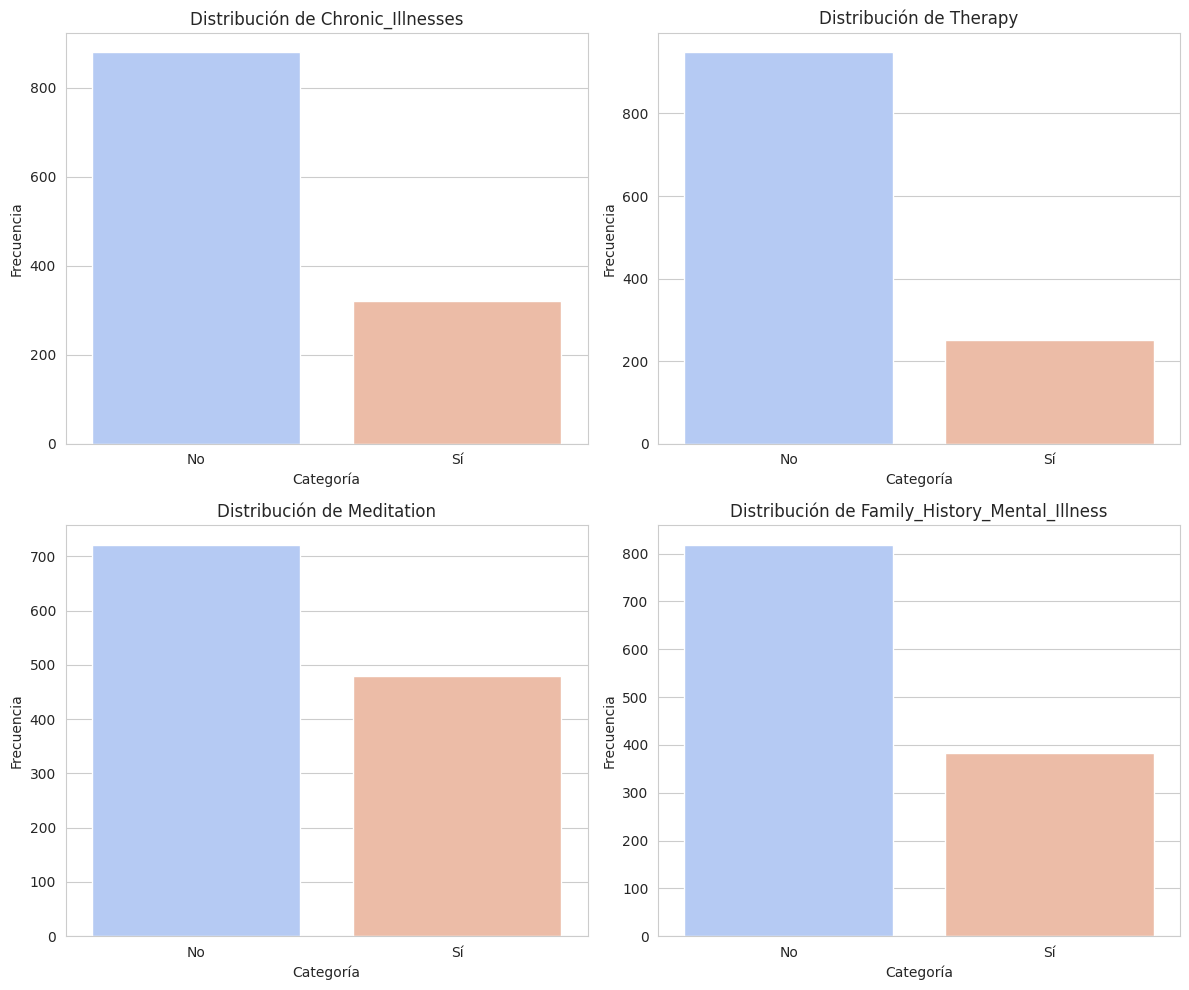

In [206]:
# Crear subgr√°ficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Generar gr√°ficos de barras
for i, var in enumerate(var_binarias):
    ax = axes[i // 2, i % 2]  # Posici√≥n en la cuadr√≠cula
    sns.countplot(x=var, data=df_binarias, palette="coolwarm", ax=ax)
    ax.set_title(f"Distribuci√≥n de {var}")
    ax.set_xlabel("Categor√≠a")
    ax.set_ylabel("Frecuencia")
    ax.set_xticklabels(["No", "S√≠"])  # Opcional: Renombrar 0 y 1

# Ajustar espaciado
plt.tight_layout()
plt.show()

### An√°lisis de la relaci√≥n entre variables binarias utilizando tablas de contingencia.

In [207]:
# An√°lisis de todas las combinaciones posibles de variables binarias
for i in range(len(var_binarias)):
    for j in range(i + 1, len(var_binarias)):
        var1 = var_binarias[i]
        var2 = var_binarias[j]

        # Crear tabla de contingencia
        tabla_contingencia = pd.crosstab(df[var1], df[var2])
        print(f"\nTabla de Contingencia entre {var1} y {var2}:")
        print(tabla_contingencia)

        # Prueba de Chi-cuadrado
        chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

        # Mostrar resultados
        print(f"\nPrueba de Chi-cuadrado entre {var1} y {var2}:")
        print(f" - Chi-cuadrado: {chi2:.4f}")
        print(f" - p-valor: {p:.4f}")
        print(f" - Grados de libertad: {dof}")

        # Evaluar relaci√≥n significativa
        if p < 0.05:
            print("\n‚úÖ Conclusi√≥n: Hay una relaci√≥n significativa entre las variables.")
        else:
            print("\n‚ùå Conclusi√≥n: No hay evidencia suficiente para afirmar que hay relaci√≥n.")



Tabla de Contingencia entre Chronic_Illnesses y Therapy:
Therapy              0    1
Chronic_Illnesses          
0                  703  176
1                  245   76

Prueba de Chi-cuadrado entre Chronic_Illnesses y Therapy:
 - Chi-cuadrado: 1.6778
 - p-valor: 0.1952
 - Grados de libertad: 1

‚ùå Conclusi√≥n: No hay evidencia suficiente para afirmar que hay relaci√≥n.

Tabla de Contingencia entre Chronic_Illnesses y Meditation:
Meditation           0    1
Chronic_Illnesses          
0                  526  353
1                  195  126

Prueba de Chi-cuadrado entre Chronic_Illnesses y Meditation:
 - Chi-cuadrado: 0.0473
 - p-valor: 0.8279
 - Grados de libertad: 1

‚ùå Conclusi√≥n: No hay evidencia suficiente para afirmar que hay relaci√≥n.

Tabla de Contingencia entre Chronic_Illnesses y Family_History_Mental_Illness:
Family_History_Mental_Illness    0    1
Chronic_Illnesses                      
0                              604  275
1                              214  107

Pru

### C√°lculo del coeficiente de correlaci√≥n Phi y visualizaci√≥n mediante matrices de correlaci√≥n Phi.

In [208]:
# Crear matriz de correlaci√≥n Phi (que es la misma que Pearson para binarias)
phi_matrix = df_binarias.corr(method="pearson")

# Mostrar la matriz de correlaci√≥n Phi
print("\nMatriz de correlaci√≥n Phi:")
phi_matrix


Matriz de correlaci√≥n Phi:


Chronic_Illnesses   Therapy  Meditation  \
Chronic_Illnesses                       1.000000  0.039703   -0.008198   
Therapy                                 0.039703  1.000000   -0.031709   
Meditation                             -0.008198 -0.031709    1.000000   
Family_History_Mental_Illness           0.019459 -0.036103   -0.005412   

                               Family_History_Mental_Illness  
Chronic_Illnesses                                   0.019459  
Therapy                                            -0.036103  
Meditation                                         -0.005412  
Family_History_Mental_Illness                       1.000000

**Interpretaci√≥n de la Matriz de Correlaci√≥n Phi**  

Los valores de Phi van de **-1 a 1**, donde:  
- **Cercano a 1** ‚Üí **Fuerte asociaci√≥n positiva** üî•  
- **Cercano a -1** ‚Üí **Fuerte asociaci√≥n negativa** üö®  
- **Cercano a 0** ‚Üí **Sin asociaci√≥n significativa** ‚ö™  

**An√°lisis de las correlaciones**:  
1. **Chronic_Illnesses y Therapy** ‚Üí `0.0397` ‚ö™  
   ‚Üí **No hay una asociaci√≥n significativa** entre tener enfermedades cr√≥nicas y asistir a terapia.  

2. **Chronic_Illnesses y Meditation** ‚Üí `-0.0082` ‚ö™  
   ‚Üí **Sin relaci√≥n significativa** entre enfermedades cr√≥nicas y la meditaci√≥n.  

3. **Chronic_Illnesses y Family_History_Mental_Illness** ‚Üí `0.0195` ‚ö™  
   ‚Üí **Relaci√≥n pr√°cticamente nula**, el historial familiar de enfermedad mental no parece estar relacionado con enfermedades cr√≥nicas.  

4. **Therapy y Meditation** ‚Üí `-0.0317` ‚ö™  
   ‚Üí **Relaci√≥n muy d√©bil y negativa**, lo que indica que quienes hacen meditaci√≥n no necesariamente van a terapia.  

5. **Therapy y Family_History_Mental_Illness** ‚Üí `-0.0361` ‚ö™  
   ‚Üí **Relaci√≥n muy d√©bil y negativa**, no se puede concluir que tener antecedentes familiares influya en asistir a terapia.  

6. **Meditation y Family_History_Mental_Illness** ‚Üí `-0.0054` ‚ö™  
   ‚Üí **Sin relaci√≥n significativa**, el historial familiar de enfermedad mental no parece estar vinculado con la pr√°ctica de meditaci√≥n.  

**Conclusi√≥n General:**  
**No hay asociaciones significativas** entre ninguna de las variables binarias analizadas. Los valores de Phi est√°n muy cerca de **0**, lo que sugiere que estas variables son **independientes entre s√≠**.  

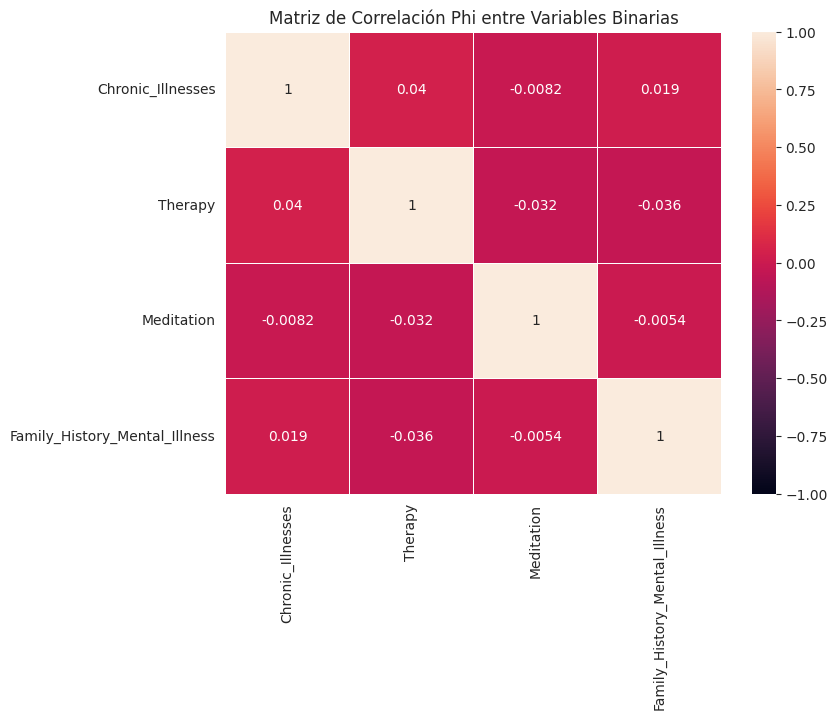

In [209]:
# Configurar tama√±o del gr√°fico
plt.figure(figsize=(8, 6))

# Crear heatmap de la matriz Phi
sns.heatmap(phi_matrix, annot=True, cmap="rocket", center=0, linewidths=0.5, vmin=-1, vmax=1)

# T√≠tulo del gr√°fico
plt.title("Matriz de Correlaci√≥n Phi entre Variables Binarias")
plt.show()


### Aplicaci√≥n de la prueba t-Student para comparar grupos definidos por variables binarias y an√°lisis de significancia



In [210]:
def t_student_test(df, var_numerica, var_binaria, alpha=0.05):
    '''
    Aplica la prueba t-Student para comparar la media de una variable num√©rica
    entre dos grupos definidos por una variable binaria.

    Par√°metros:
        df (DataFrame): DataFrame con los datos.
        var_numerica (str): Nombre de la variable num√©rica a comparar.
        var_binaria (str): Nombre de la variable binaria que define los grupos.
        alpha (float): Nivel de significancia (por defecto 0.05).

    Retorna:
        None (imprime los resultados en pantalla).
    '''
    # Separar los datos en dos grupos seg√∫n la variable binaria
    grupo_0 = df[df[var_binaria] == 0][var_numerica]
    grupo_1 = df[df[var_binaria] == 1][var_numerica]

    # Aplicar la prueba t-Student (Welch‚Äôs t-test si varianzas son diferentes)
    t_stat, p_value = stats.ttest_ind(grupo_0, grupo_1, equal_var=False)

    # Mostrar resultados
    print(f"\nPrueba t-Student para {var_numerica} seg√∫n {var_binaria}:")
    print(f" - Estad√≠stico t: {t_stat:.4f}")
    print(f" - p-valor: {p_value:.4f}")

    # Interpretaci√≥n del resultado
    if p_value < alpha:
        print("\n‚úÖ Hay una diferencia significativa entre los grupos.")
    else:
        print("\n‚ùå No hay evidencia suficiente para afirmar que hay una diferencia entre los grupos.")



In [211]:
# "Age", "Sleep_Hours", "Physical_Activity_Hrs", "Social_Support_Score", "Anxiety_Score", "Depression_Score", "Stress_Level", "Financial_Stress", "Work_Stress", "Self_Esteem_Score", "Life_Satisfaction_Score", "Loneliness_Score"

In [212]:
t_student_test(df, "Age", "Chronic_Illnesses")
t_student_test(df, "Age", "Therapy")
t_student_test(df, "Age", "Meditation")
t_student_test(df, "Age", "Family_History_Mental_Illness")
t_student_test(df,"Physical_Activity_Hrs", "Chronic_Illnesses")
t_student_test(df, "Physical_Activity_Hrs", "Therapy")
t_student_test(df, "Physical_Activity_Hrs", "Meditation")


Prueba t-Student para Age seg√∫n Chronic_Illnesses:
 - Estad√≠stico t: -0.1109
 - p-valor: 0.9117

‚ùå No hay evidencia suficiente para afirmar que hay una diferencia entre los grupos.

Prueba t-Student para Age seg√∫n Therapy:
 - Estad√≠stico t: -1.1720
 - p-valor: 0.2419

‚ùå No hay evidencia suficiente para afirmar que hay una diferencia entre los grupos.

Prueba t-Student para Age seg√∫n Meditation:
 - Estad√≠stico t: -0.3194
 - p-valor: 0.7495

‚ùå No hay evidencia suficiente para afirmar que hay una diferencia entre los grupos.

Prueba t-Student para Age seg√∫n Family_History_Mental_Illness:
 - Estad√≠stico t: 0.1535
 - p-valor: 0.8780

‚ùå No hay evidencia suficiente para afirmar que hay una diferencia entre los grupos.

Prueba t-Student para Physical_Activity_Hrs seg√∫n Chronic_Illnesses:
 - Estad√≠stico t: -0.1951
 - p-valor: 0.8454

‚ùå No hay evidencia suficiente para afirmar que hay una diferencia entre los grupos.

Prueba t-Student para Physical_Activity_Hrs seg√∫n Therap

## Relaciones entre variables

### Estudio de la correlaci√≥n entre variables cuantitativas mediante la matriz de correlaci√≥n y el coeficiente de correlaci√≥n de Pearson

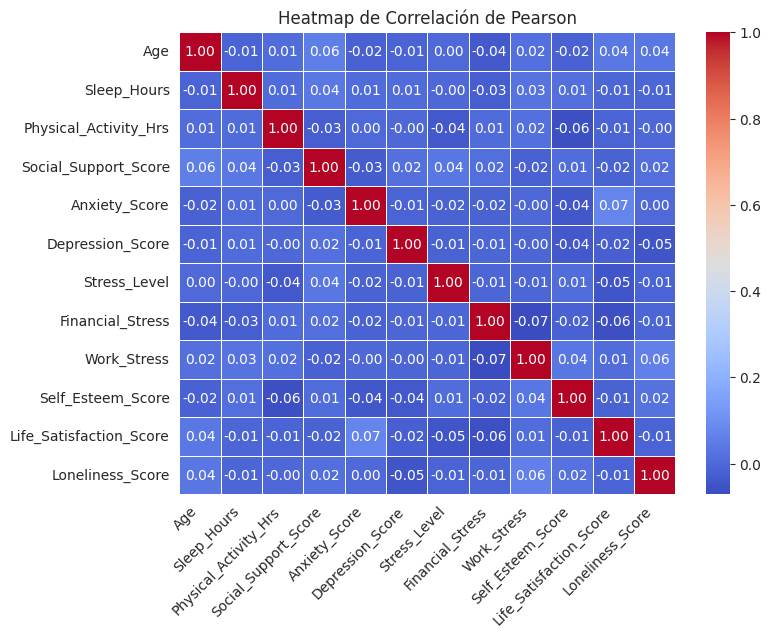

In [213]:
# Calcular la matriz de correlaci√≥n
corr_matrix = df_cuantitativas.corr(method='pearson')

# Visualizar el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# Personalizar etiquetas
plt.title("Heatmap de Correlaci√≥n de Pearson")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()

### Conclusi√≥n
No hay correlaciones fuertes en los datos analizados.

## Conclusi√≥n General y resumen de hallazgo

El an√°lisis descriptivo de los datos ha permitido identificar tendencias clave en diversas √°reas, incluyendo edad, sue√±o, actividad f√≠sica, apoyo social y salud mental. La distribuci√≥n de la edad es sim√©trica con una media de 46.3 a√±os, mientras que las horas de sue√±o se encuentran en un promedio de 6.47 horas, aunque algunos participantes presentan patrones extremos de sue√±o. La actividad f√≠sica sigue una distribuci√≥n exponencial, con la mayor√≠a de los individuos realizando poca actividad. En cuanto al apoyo social, la mayor√≠a de los participantes reporta niveles medios a altos, aunque existe una minor√≠a con poco respaldo social.

Los puntajes de ansiedad, depresi√≥n y estr√©s presentan una alta variabilidad, con niveles de ansiedad y depresi√≥n relativamente elevados en la muestra. Los niveles de estr√©s financiero y laboral son similares, lo que sugiere que ambos representan factores de preocupaci√≥n importantes. La autoestima, la satisfacci√≥n con la vida y la soledad muestran una distribuci√≥n estable con una percepci√≥n promedio neutral.

Las pruebas de normalidad indican que la mayor√≠a de las variables no siguen una distribuci√≥n normal, excepto las horas de sue√±o. Se identific√≥ que la actividad f√≠sica sigue una distribuci√≥n exponencial, sugiriendo que la mayor parte de los individuos tienen niveles bajos de actividad con algunos valores extremos.

A nivel demogr√°fico, la mayor√≠a de los participantes son mujeres (47.42%) y el nivel educativo est√° equilibrado, aunque destaca un porcentaje alto con doctorado (21.83%). En cuanto al empleo, hay una distribuci√≥n balanceada entre empleados, estudiantes, desempleados y jubilados. El uso de medicamentos y sustancias es bajo en general, lo que sugiere una poblaci√≥n mayormente saludable.

El an√°lisis de correlaciones revel√≥ que, aunque algunas variables mostraban asociaciones visualmente fuertes en el heatmap, las pruebas de Chi-cuadrado no confirmaron significancia estad√≠stica en la mayor√≠a de los casos. La excepci√≥n fue la relaci√≥n entre g√©nero y el uso de medicamentos, que mostr√≥ una asociaci√≥n significativa, aunque d√©bil.

**Reflexi√≥n sobre la Utilidad del An√°lisis Descriptivo**

El an√°lisis descriptivo ha demostrado ser una herramienta fundamental para comprender la distribuci√≥n de los datos y las tendencias generales en la poblaci√≥n. Permite identificar patrones relevantes, detectar valores at√≠picos y establecer puntos de referencia para an√°lisis posteriores. Adem√°s, facilita la toma de decisiones informadas sobre la aplicaci√≥n de pruebas estad√≠sticas apropiadas, como la elecci√≥n entre pruebas param√©tricas o no param√©tricas seg√∫n la normalidad de los datos.

**Posibles Limitaciones del An√°lisis y Sugerencias para Futuros Estudios:**
* **Sesgo de Muestra:** El alto porcentaje de participantes con doctorado sugiere un posible sesgo de muestreo, lo que limita la generalizaci√≥n de los resultados a poblaciones m√°s amplias.
* **Correlaciones No Significativas:** La falta de asociaciones significativas entre muchas de las variables analizadas podr√≠a deberse al tama√±o de la muestra, la distribuci√≥n de los datos o la naturaleza de las variables.
* **Dise√±o Transversal:** Este estudio es transversal, por lo que no se pueden establecer relaciones causales entre las variables.

**Sugerencias para futuros estudios:**
* Investigar las razones del alto nivel educativo de la muestra y su posible impacto en las variables de inter√©s.
* Explorar las razones de la baja asistencia a terapia y promover intervenciones para aumentar el acceso y reducir el estigma.
* Examinar la relaci√≥n entre el estr√©s financiero, el estr√©s laboral y la salud mental con mayor profundidad, utilizando dise√±os longitudinales para establecer la causalidad.
* Considerar el uso de m√©todos de muestreo m√°s diversos para mejorar la representatividad de la muestra.
* Incluir otras variables que puedan influir en la salud y el bienestar, como la calidad del sue√±o, la dieta y el ejercicio.